# Multi-armed bandits

River has a `bandit` module. It contains several multi-armed bandit policies, bandit environments, and utilities to benchmark policies on bandit problems.

Bandit environments in River implement the [Gym](https://www.gymlibrary.dev/) interface. You can thus load them with `gym.make`. Note that Gym is intended for reinforcement learning algorithms, while bandit policies are the simplest form of reinforcement learing. Bandit policies learn by receiving a reward after each step, while reinforcement learning algorithms have to learn from feedback that may arrive at the end of a (long) sequence of steps.

In [1]:
import gymnasium as gym

for k in gym.envs.registry:
    if k.startswith('river_bandits'):
        print(k)


River's bandit module offers the `bandit.evaluate` function to benchmark several policies on a given environment. It takes as input a list of bandit policies, a bandit environment (the problem to solve), and a reward object.

In [2]:
import gymnasium as gym
from river import bandit
import pandas as pd
from tqdm import tqdm
from river import stats

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)

trace = bandit.evaluate(
    policies=policies,
    env=env,
    reward_stat=stats.Mean(),
    n_episodes=(n_episodes := 2000),
)


The `bandit.evaluate` function returns a generator containing the results at each step of the benchmark. This can be wrapped with a `pandas.DataFrame` to gather all the results.

In [3]:
trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))
trace_df.sample(5, random_state=42)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 11959/6000000 [00:00<00:50, 119583.27it/s]

  0%|          | 24001/6000000 [00:00<00:50, 118826.18it/s]

  1%|          | 36001/6000000 [00:00<00:50, 118803.23it/s]

  1%|          | 48010/6000000 [00:00<00:49, 119303.74it/s]

  1%|          | 60001/6000000 [00:00<00:49, 119311.16it/s]

  1%|          | 72001/6000000 [00:00<00:49, 119392.66it/s]

  1%|▏         | 84060/6000000 [00:00<00:49, 119780.09it/s]

  2%|▏         | 96039/6000000 [00:00<00:49, 119701.97it/s]

  2%|▏         | 108133/6000000 [00:00<00:49, 120086.08it/s]

  2%|▏         | 120264/6000000 [00:01<00:48, 120461.20it/s]

  2%|▏         | 132517/6000000 [00:01<00:48, 121092.51it/s]

  2%|▏         | 144825/6000000 [00:01<00:48, 121693.73it/s]

  3%|▎         | 156995/6000000 [00:01<00:48, 121189.13it/s]

  3%|▎         | 169115/6000000 [00:01<00:48, 120690.25it/s]

  3%|▎         | 181231/6000000 [00:01<00:48, 120830.28it/s]

  3%|▎         | 193315/6000000 [00:01<00:48, 120581.55it/s]

  3%|▎         | 205374/6000000 [00:01<00:48, 120257.98it/s]

  4%|▎         | 217401/6000000 [00:01<00:48, 120193.39it/s]

  4%|▍         | 229452/6000000 [00:01<00:47, 120287.56it/s]

  4%|▍         | 241568/6000000 [00:02<00:47, 120546.54it/s]

  4%|▍         | 253623/6000000 [00:02<00:47, 120496.48it/s]

  4%|▍         | 265673/6000000 [00:02<00:47, 120344.79it/s]

  5%|▍         | 277708/6000000 [00:02<00:47, 120279.14it/s]

  5%|▍         | 289757/6000000 [00:02<00:47, 120339.32it/s]

  5%|▌         | 301791/6000000 [00:02<00:47, 120266.70it/s]

  5%|▌         | 313898/6000000 [00:02<00:47, 120505.79it/s]

  5%|▌         | 325949/6000000 [00:02<00:47, 120367.99it/s]

  6%|▌         | 337986/6000000 [00:02<00:48, 116913.20it/s]

  6%|▌         | 350192/6000000 [00:02<00:47, 118423.39it/s]

  6%|▌         | 362229/6000000 [00:03<00:47, 118996.57it/s]

  6%|▌         | 374450/6000000 [00:03<00:46, 119948.35it/s]

  6%|▋         | 386456/6000000 [00:03<00:46, 119948.16it/s]

  7%|▋         | 398459/6000000 [00:03<00:46, 119966.90it/s]

  7%|▋         | 410499/6000000 [00:03<00:46, 120094.83it/s]

  7%|▋         | 422513/6000000 [00:03<00:46, 119930.77it/s]

  7%|▋         | 434527/6000000 [00:03<00:46, 119990.91it/s]

  7%|▋         | 446528/6000000 [00:03<00:46, 119786.58it/s]

  8%|▊         | 458697/6000000 [00:03<00:46, 120355.09it/s]

  8%|▊         | 470902/6000000 [00:03<00:45, 120859.88it/s]

  8%|▊         | 482989/6000000 [00:04<00:53, 102176.57it/s]

  8%|▊         | 494957/6000000 [00:04<00:51, 106823.37it/s]

  8%|▊         | 507001/6000000 [00:04<00:49, 110188.05it/s]

  9%|▊         | 519102/6000000 [00:04<00:48, 113232.79it/s]

  9%|▉         | 531131/6000000 [00:04<00:47, 115255.23it/s]

  9%|▉         | 543003/6000000 [00:04<00:46, 116246.69it/s]

  9%|▉         | 555001/6000000 [00:04<00:46, 117171.39it/s]

  9%|▉         | 567001/6000000 [00:04<00:46, 117564.64it/s]

 10%|▉         | 579196/6000000 [00:04<00:45, 118858.25it/s]

 10%|▉         | 591189/6000000 [00:04<00:45, 119175.39it/s]

 10%|█         | 603140/6000000 [00:05<00:45, 118712.26it/s]

 10%|█         | 615423/6000000 [00:05<00:44, 119935.78it/s]

 10%|█         | 627496/6000000 [00:05<00:44, 120169.70it/s]

 11%|█         | 639526/6000000 [00:05<00:44, 120044.91it/s]

 11%|█         | 651768/6000000 [00:05<00:44, 120753.20it/s]

 11%|█         | 663850/6000000 [00:05<00:44, 120535.91it/s]

 11%|█▏        | 676046/6000000 [00:05<00:44, 120960.57it/s]

 11%|█▏        | 688146/6000000 [00:05<00:44, 120650.14it/s]

 12%|█▏        | 700309/6000000 [00:05<00:43, 120942.51it/s]

 12%|█▏        | 712406/6000000 [00:05<00:44, 119994.42it/s]

 12%|█▏        | 724517/6000000 [00:06<00:43, 120325.51it/s]

 12%|█▏        | 736552/6000000 [00:06<00:44, 119300.35it/s]

 12%|█▏        | 748642/6000000 [00:06<00:43, 119773.05it/s]

 13%|█▎        | 760702/6000000 [00:06<00:43, 120017.96it/s]

 13%|█▎        | 772805/6000000 [00:06<00:43, 120318.63it/s]

 13%|█▎        | 784853/6000000 [00:06<00:43, 120366.23it/s]

 13%|█▎        | 797031/6000000 [00:06<00:43, 120786.82it/s]

 13%|█▎        | 809111/6000000 [00:06<00:42, 120760.19it/s]

 14%|█▎        | 821188/6000000 [00:06<00:42, 120637.87it/s]

 14%|█▍        | 833253/6000000 [00:06<00:42, 120584.28it/s]

 14%|█▍        | 845312/6000000 [00:07<00:42, 120377.29it/s]

 14%|█▍        | 857518/6000000 [00:07<00:42, 120880.05it/s]

 14%|█▍        | 869607/6000000 [00:07<00:42, 120436.95it/s]

 15%|█▍        | 881652/6000000 [00:07<00:42, 120364.11it/s]

 15%|█▍        | 894001/6000000 [00:07<00:42, 120793.19it/s]

 15%|█▌        | 906084/6000000 [00:07<00:42, 120802.49it/s]

 15%|█▌        | 918224/6000000 [00:07<00:42, 120978.21it/s]

 16%|█▌        | 930424/6000000 [00:07<00:41, 121280.90it/s]

 16%|█▌        | 942553/6000000 [00:07<00:42, 120245.00it/s]

 16%|█▌        | 954580/6000000 [00:08<00:42, 119760.45it/s]

 16%|█▌        | 966684/6000000 [00:08<00:41, 120139.85it/s]

 16%|█▋        | 978839/6000000 [00:08<00:41, 120558.08it/s]

 17%|█▋        | 991135/6000000 [00:08<00:41, 121273.18it/s]

 17%|█▋        | 1003264/6000000 [00:08<00:41, 120883.09it/s]

 17%|█▋        | 1015408/6000000 [00:08<00:41, 121047.34it/s]

 17%|█▋        | 1027578/6000000 [00:08<00:41, 121239.91it/s]

 17%|█▋        | 1039703/6000000 [00:08<00:41, 120812.93it/s]

 18%|█▊        | 1051922/6000000 [00:08<00:40, 121221.52it/s]

 18%|█▊        | 1064045/6000000 [00:08<00:40, 120589.58it/s]

 18%|█▊        | 1076125/6000000 [00:09<00:40, 120650.67it/s]

 18%|█▊        | 1088191/6000000 [00:09<00:40, 120384.02it/s]

 18%|█▊        | 1100328/6000000 [00:09<00:40, 120675.64it/s]

 19%|█▊        | 1112443/6000000 [00:09<00:40, 120813.50it/s]

 19%|█▊        | 1124625/6000000 [00:09<00:40, 121112.41it/s]

 19%|█▉        | 1136737/6000000 [00:09<00:40, 120974.93it/s]

 19%|█▉        | 1148843/6000000 [00:09<00:40, 120998.28it/s]

 19%|█▉        | 1161001/6000000 [00:09<00:40, 120592.79it/s]

 20%|█▉        | 1173145/6000000 [00:09<00:39, 120844.09it/s]

 20%|█▉        | 1185230/6000000 [00:09<00:39, 120712.81it/s]

 20%|█▉        | 1197408/6000000 [00:10<00:39, 121030.35it/s]

 20%|██        | 1209683/6000000 [00:10<00:39, 121544.46it/s]

 20%|██        | 1221838/6000000 [00:10<00:39, 121461.91it/s]

 21%|██        | 1233985/6000000 [00:10<00:39, 121094.56it/s]

 21%|██        | 1246095/6000000 [00:10<00:39, 120639.66it/s]

 21%|██        | 1258160/6000000 [00:10<00:39, 120432.08it/s]

 21%|██        | 1270204/6000000 [00:10<00:39, 120194.11it/s]

 21%|██▏       | 1282426/6000000 [00:10<00:39, 120796.34it/s]

 22%|██▏       | 1294557/6000000 [00:10<00:38, 120947.12it/s]

 22%|██▏       | 1306773/6000000 [00:10<00:38, 121309.06it/s]

 22%|██▏       | 1318950/6000000 [00:11<00:38, 121444.72it/s]

 22%|██▏       | 1331231/6000000 [00:11<00:38, 121852.21it/s]

 22%|██▏       | 1343417/6000000 [00:11<00:38, 121338.79it/s]

 23%|██▎       | 1355552/6000000 [00:11<00:38, 120981.23it/s]

 23%|██▎       | 1367743/6000000 [00:11<00:38, 121257.59it/s]

 23%|██▎       | 1379870/6000000 [00:11<00:38, 121124.98it/s]

 23%|██▎       | 1391983/6000000 [00:11<00:38, 120884.98it/s]

 23%|██▎       | 1404072/6000000 [00:11<00:38, 120004.25it/s]

 24%|██▎       | 1416092/6000000 [00:11<00:38, 120059.75it/s]

 24%|██▍       | 1428116/6000000 [00:11<00:38, 120110.84it/s]

 24%|██▍       | 1440312/6000000 [00:12<00:37, 120661.22it/s]

 24%|██▍       | 1452465/6000000 [00:12<00:37, 120920.33it/s]

 24%|██▍       | 1464558/6000000 [00:12<00:37, 120695.87it/s]

 25%|██▍       | 1476629/6000000 [00:12<00:37, 120335.03it/s]

 25%|██▍       | 1488663/6000000 [00:12<00:37, 120311.44it/s]

 25%|██▌       | 1500695/6000000 [00:12<00:37, 120304.34it/s]

 25%|██▌       | 1512726/6000000 [00:12<00:37, 120252.68it/s]

 25%|██▌       | 1525172/6000000 [00:12<00:36, 121512.06it/s]

 26%|██▌       | 1537324/6000000 [00:12<00:36, 120942.01it/s]

 26%|██▌       | 1549429/6000000 [00:12<00:36, 120972.93it/s]

 26%|██▌       | 1561527/6000000 [00:13<00:36, 120390.65it/s]

 26%|██▌       | 1573703/6000000 [00:13<00:36, 120798.48it/s]

 26%|██▋       | 1585784/6000000 [00:13<00:36, 120522.43it/s]

 27%|██▋       | 1597837/6000000 [00:13<00:36, 120059.24it/s]

 27%|██▋       | 1609844/6000000 [00:13<00:36, 119847.78it/s]

 27%|██▋       | 1621830/6000000 [00:13<00:36, 119691.28it/s]

 27%|██▋       | 1633861/6000000 [00:13<00:36, 119873.68it/s]

 27%|██▋       | 1646018/6000000 [00:13<00:36, 120379.76it/s]

 28%|██▊       | 1658057/6000000 [00:13<00:36, 120227.82it/s]

 28%|██▊       | 1670081/6000000 [00:13<00:36, 119889.27it/s]

 28%|██▊       | 1682071/6000000 [00:14<00:36, 119800.14it/s]

 28%|██▊       | 1694055/6000000 [00:14<00:35, 119807.82it/s]

 28%|██▊       | 1706036/6000000 [00:14<00:35, 119320.24it/s]

 29%|██▊       | 1718081/6000000 [00:14<00:35, 119655.23it/s]

 29%|██▉       | 1730290/6000000 [00:14<00:35, 120381.88it/s]

 29%|██▉       | 1742329/6000000 [00:14<00:35, 119798.59it/s]

 29%|██▉       | 1754310/6000000 [00:14<00:35, 118809.22it/s]

 29%|██▉       | 1766287/6000000 [00:14<00:35, 119092.46it/s]

 30%|██▉       | 1778320/6000000 [00:14<00:35, 119458.79it/s]

 30%|██▉       | 1790268/6000000 [00:14<00:35, 119430.04it/s]

 30%|███       | 1802378/6000000 [00:15<00:35, 119928.66it/s]

 30%|███       | 1814372/6000000 [00:15<00:34, 119788.84it/s]

 30%|███       | 1826352/6000000 [00:15<00:34, 119579.61it/s]

 31%|███       | 1838311/6000000 [00:15<00:34, 119358.98it/s]

 31%|███       | 1850248/6000000 [00:15<00:34, 119100.83it/s]

 31%|███       | 1862467/6000000 [00:15<00:34, 120022.27it/s]

 31%|███       | 1874470/6000000 [00:15<00:34, 119603.52it/s]

 31%|███▏      | 1886456/6000000 [00:15<00:34, 119678.97it/s]

 32%|███▏      | 1898488/6000000 [00:15<00:34, 119865.50it/s]

 32%|███▏      | 1910542/6000000 [00:15<00:34, 120065.39it/s]

 32%|███▏      | 1922576/6000000 [00:16<00:33, 120146.39it/s]

 32%|███▏      | 1934591/6000000 [00:16<00:33, 119744.03it/s]

 32%|███▏      | 1946566/6000000 [00:16<00:33, 119393.33it/s]

 33%|███▎      | 1958517/6000000 [00:16<00:33, 119427.45it/s]

 33%|███▎      | 1970661/6000000 [00:16<00:33, 120028.34it/s]

 33%|███▎      | 1982667/6000000 [00:16<00:33, 120035.19it/s]

 33%|███▎      | 1994671/6000000 [00:16<00:33, 119219.69it/s]

 33%|███▎      | 2006595/6000000 [00:16<00:33, 117625.26it/s]

 34%|███▎      | 2018658/6000000 [00:16<00:33, 118511.38it/s]

 34%|███▍      | 2030656/6000000 [00:16<00:33, 118946.05it/s]

 34%|███▍      | 2042885/6000000 [00:17<00:32, 119940.61it/s]

 34%|███▍      | 2054883/6000000 [00:17<00:32, 119838.34it/s]

 34%|███▍      | 2066870/6000000 [00:17<00:32, 119667.35it/s]

 35%|███▍      | 2078856/6000000 [00:17<00:32, 119723.25it/s]

 35%|███▍      | 2090863/6000000 [00:17<00:32, 119824.21it/s]

 35%|███▌      | 2102869/6000000 [00:17<00:32, 119891.94it/s]

 35%|███▌      | 2114956/6000000 [00:17<00:32, 120182.16it/s]

 35%|███▌      | 2126975/6000000 [00:17<00:32, 117699.76it/s]

 36%|███▌      | 2138989/6000000 [00:17<00:32, 118418.30it/s]

 36%|███▌      | 2150841/6000000 [00:17<00:32, 118030.68it/s]

 36%|███▌      | 2162794/6000000 [00:18<00:32, 118471.99it/s]

 36%|███▌      | 2174842/6000000 [00:18<00:32, 119068.07it/s]

 36%|███▋      | 2186779/6000000 [00:18<00:32, 119155.18it/s]

 37%|███▋      | 2198734/6000000 [00:18<00:31, 119271.21it/s]

 37%|███▋      | 2210747/6000000 [00:18<00:31, 119527.14it/s]

 37%|███▋      | 2223001/6000000 [00:18<00:31, 119839.05it/s]

 37%|███▋      | 2235107/6000000 [00:18<00:31, 120201.62it/s]

 37%|███▋      | 2247128/6000000 [00:18<00:32, 116882.79it/s]

 38%|███▊      | 2259190/6000000 [00:18<00:31, 117978.92it/s]

 38%|███▊      | 2271201/6000000 [00:18<00:31, 118606.88it/s]

 38%|███▊      | 2283295/6000000 [00:19<00:31, 119297.86it/s]

 38%|███▊      | 2295482/6000000 [00:19<00:30, 120063.00it/s]

 38%|███▊      | 2307496/6000000 [00:19<00:30, 119679.36it/s]

 39%|███▊      | 2319470/6000000 [00:19<00:30, 119547.73it/s]

 39%|███▉      | 2331429/6000000 [00:19<00:30, 119429.51it/s]

 39%|███▉      | 2343705/6000000 [00:19<00:30, 120422.60it/s]

 39%|███▉      | 2355836/6000000 [00:19<00:30, 120687.35it/s]

 39%|███▉      | 2367907/6000000 [00:19<00:30, 117942.26it/s]

 40%|███▉      | 2379897/6000000 [00:19<00:30, 118517.46it/s]

 40%|███▉      | 2391773/6000000 [00:19<00:30, 118586.93it/s]

 40%|████      | 2403707/6000000 [00:20<00:30, 118809.06it/s]

 40%|████      | 2415619/6000000 [00:20<00:30, 118900.96it/s]

 40%|████      | 2427669/6000000 [00:20<00:29, 119377.79it/s]

 41%|████      | 2439695/6000000 [00:20<00:29, 119641.35it/s]

 41%|████      | 2451670/6000000 [00:20<00:29, 119668.02it/s]

 41%|████      | 2463733/6000000 [00:20<00:29, 119955.44it/s]

 41%|████▏     | 2475730/6000000 [00:20<00:29, 119705.05it/s]

 41%|████▏     | 2487702/6000000 [00:20<00:29, 118029.62it/s]

 42%|████▏     | 2499765/6000000 [00:20<00:29, 118799.01it/s]

 42%|████▏     | 2512157/6000000 [00:20<00:28, 120321.55it/s]

 42%|████▏     | 2524363/6000000 [00:21<00:28, 120836.39it/s]

 42%|████▏     | 2536451/6000000 [00:21<00:28, 120776.41it/s]

 42%|████▏     | 2548559/6000000 [00:21<00:28, 120863.78it/s]

 43%|████▎     | 2560648/6000000 [00:21<00:28, 120284.10it/s]

 43%|████▎     | 2572679/6000000 [00:21<00:28, 120196.74it/s]

 43%|████▎     | 2584700/6000000 [00:21<00:28, 119979.20it/s]

 43%|████▎     | 2596699/6000000 [00:21<00:28, 119849.12it/s]

 43%|████▎     | 2608685/6000000 [00:21<00:28, 117099.76it/s]

 44%|████▎     | 2620751/6000000 [00:21<00:28, 118147.36it/s]

 44%|████▍     | 2632837/6000000 [00:21<00:28, 118948.60it/s]

 44%|████▍     | 2644812/6000000 [00:22<00:28, 119184.04it/s]

 44%|████▍     | 2656737/6000000 [00:22<00:28, 119125.60it/s]

 44%|████▍     | 2668655/6000000 [00:22<00:27, 119073.32it/s]

 45%|████▍     | 2680699/6000000 [00:22<00:27, 119478.68it/s]

 45%|████▍     | 2692742/6000000 [00:22<00:27, 119762.04it/s]

 45%|████▌     | 2704720/6000000 [00:22<00:27, 119499.33it/s]

 45%|████▌     | 2716672/6000000 [00:22<00:34, 95025.19it/s] 

 45%|████▌     | 2728666/6000000 [00:22<00:32, 101341.99it/s]

 46%|████▌     | 2740823/6000000 [00:22<00:30, 106720.91it/s]

 46%|████▌     | 2752915/6000000 [00:23<00:29, 110628.98it/s]

 46%|████▌     | 2764977/6000000 [00:23<00:28, 113447.86it/s]

 46%|████▋     | 2776970/6000000 [00:23<00:27, 115307.99it/s]

 46%|████▋     | 2788723/6000000 [00:23<00:27, 115953.84it/s]

 47%|████▋     | 2800617/6000000 [00:23<00:27, 116830.17it/s]

 47%|████▋     | 2812554/6000000 [00:23<00:27, 117577.76it/s]

 47%|████▋     | 2824392/6000000 [00:23<00:26, 117728.54it/s]

 47%|████▋     | 2836221/6000000 [00:23<00:27, 114945.67it/s]

 47%|████▋     | 2848146/6000000 [00:23<00:27, 116205.29it/s]

 48%|████▊     | 2860032/6000000 [00:23<00:26, 116987.60it/s]

 48%|████▊     | 2872210/6000000 [00:24<00:26, 118408.02it/s]

 48%|████▊     | 2884273/6000000 [00:24<00:26, 119068.09it/s]

 48%|████▊     | 2896530/6000000 [00:24<00:25, 120109.75it/s]

 48%|████▊     | 2908599/6000000 [00:24<00:25, 120280.17it/s]

 49%|████▊     | 2920636/6000000 [00:24<00:25, 120203.77it/s]

 49%|████▉     | 2932690/6000000 [00:24<00:25, 120302.87it/s]

 49%|████▉     | 2944725/6000000 [00:24<00:25, 120116.77it/s]

 49%|████▉     | 2956740/6000000 [00:24<00:25, 119579.24it/s]

 49%|████▉     | 2968788/6000000 [00:24<00:25, 119847.07it/s]

 50%|████▉     | 2980936/6000000 [00:24<00:25, 120332.90it/s]

 50%|████▉     | 2992971/6000000 [00:25<00:24, 120304.31it/s]

 50%|█████     | 3005116/6000000 [00:25<00:24, 120646.28it/s]

 50%|█████     | 3017357/6000000 [00:25<00:24, 121174.04it/s]

 50%|█████     | 3029476/6000000 [00:25<00:24, 120635.17it/s]

 51%|█████     | 3041703/6000000 [00:25<00:24, 121122.06it/s]

 51%|█████     | 3053817/6000000 [00:25<00:24, 120704.86it/s]

 51%|█████     | 3065889/6000000 [00:25<00:24, 120467.31it/s]

 51%|█████▏    | 3077937/6000000 [00:25<00:24, 119957.42it/s]

 51%|█████▏    | 3089987/6000000 [00:25<00:24, 120116.84it/s]

 52%|█████▏    | 3102000/6000000 [00:25<00:24, 119596.13it/s]

 52%|█████▏    | 3114001/6000000 [00:26<00:24, 119295.18it/s]

 52%|█████▏    | 3125999/6000000 [00:26<00:24, 119497.92it/s]

 52%|█████▏    | 3138001/6000000 [00:26<00:24, 119005.50it/s]

 53%|█████▎    | 3150065/6000000 [00:26<00:23, 119490.45it/s]

 53%|█████▎    | 3162032/6000000 [00:26<00:23, 119542.72it/s]

 53%|█████▎    | 3174219/6000000 [00:26<00:23, 120235.66it/s]

 53%|█████▎    | 3186244/6000000 [00:26<00:23, 120124.97it/s]

 53%|█████▎    | 3198343/6000000 [00:26<00:23, 120383.11it/s]

 54%|█████▎    | 3210382/6000000 [00:26<00:23, 117765.38it/s]

 54%|█████▎    | 3222410/6000000 [00:27<00:23, 118504.85it/s]

 54%|█████▍    | 3234337/6000000 [00:27<00:23, 118730.58it/s]

 54%|█████▍    | 3246498/6000000 [00:27<00:23, 119585.43it/s]

 54%|█████▍    | 3258640/6000000 [00:27<00:22, 120129.60it/s]

 55%|█████▍    | 3270658/6000000 [00:27<00:22, 120020.80it/s]

 55%|█████▍    | 3282723/6000000 [00:27<00:22, 120206.61it/s]

 55%|█████▍    | 3294783/6000000 [00:27<00:22, 120321.79it/s]

 55%|█████▌    | 3306927/6000000 [00:27<00:22, 120656.01it/s]

 55%|█████▌    | 3319091/6000000 [00:27<00:22, 120947.67it/s]

 56%|█████▌    | 3331187/6000000 [00:27<00:22, 120332.95it/s]

 56%|█████▌    | 3343222/6000000 [00:28<00:22, 120097.11it/s]

 56%|█████▌    | 3355233/6000000 [00:28<00:22, 120075.51it/s]

 56%|█████▌    | 3367242/6000000 [00:28<00:21, 119765.73it/s]

 56%|█████▋    | 3379443/6000000 [00:28<00:21, 120433.91it/s]

 57%|█████▋    | 3391488/6000000 [00:28<00:21, 120200.60it/s]

 57%|█████▋    | 3403607/6000000 [00:28<00:21, 120493.79it/s]

 57%|█████▋    | 3415657/6000000 [00:28<00:21, 120349.86it/s]

 57%|█████▋    | 3427778/6000000 [00:28<00:21, 120606.34it/s]

 57%|█████▋    | 3439861/6000000 [00:28<00:21, 120670.77it/s]

 58%|█████▊    | 3451929/6000000 [00:28<00:21, 120582.52it/s]

 58%|█████▊    | 3463992/6000000 [00:29<00:21, 120594.71it/s]

 58%|█████▊    | 3476052/6000000 [00:29<00:21, 120166.67it/s]

 58%|█████▊    | 3488278/6000000 [00:29<00:20, 120790.37it/s]

 58%|█████▊    | 3500424/6000000 [00:29<00:20, 120988.86it/s]

 59%|█████▊    | 3512524/6000000 [00:29<00:20, 120861.21it/s]

 59%|█████▊    | 3524611/6000000 [00:29<00:20, 120812.39it/s]

 59%|█████▉    | 3536693/6000000 [00:29<00:20, 120432.51it/s]

 59%|█████▉    | 3548737/6000000 [00:29<00:20, 119787.25it/s]

 59%|█████▉    | 3560717/6000000 [00:29<00:20, 119168.68it/s]

 60%|█████▉    | 3572635/6000000 [00:29<00:20, 116664.05it/s]

 60%|█████▉    | 3584630/6000000 [00:30<00:20, 117627.85it/s]

 60%|█████▉    | 3596587/6000000 [00:30<00:20, 118201.76it/s]

 60%|██████    | 3608604/6000000 [00:30<00:20, 118785.06it/s]

 60%|██████    | 3620493/6000000 [00:30<00:20, 118815.93it/s]

 61%|██████    | 3632471/6000000 [00:30<00:19, 119101.80it/s]

 61%|██████    | 3644440/6000000 [00:30<00:19, 119274.27it/s]

 61%|██████    | 3656594/6000000 [00:30<00:19, 119951.32it/s]

 61%|██████    | 3668737/6000000 [00:30<00:19, 120390.66it/s]

 61%|██████▏   | 3680815/6000000 [00:30<00:19, 120504.34it/s]

 62%|██████▏   | 3692867/6000000 [00:30<00:19, 120091.64it/s]

 62%|██████▏   | 3704878/6000000 [00:31<00:19, 120067.11it/s]

 62%|██████▏   | 3716886/6000000 [00:31<00:19, 119874.43it/s]

 62%|██████▏   | 3728874/6000000 [00:31<00:18, 119542.82it/s]

 62%|██████▏   | 3740880/6000000 [00:31<00:18, 119695.44it/s]

 63%|██████▎   | 3752850/6000000 [00:31<00:18, 119561.58it/s]

 63%|██████▎   | 3764807/6000000 [00:31<00:18, 119407.24it/s]

 63%|██████▎   | 3776760/6000000 [00:31<00:18, 119442.21it/s]

 63%|██████▎   | 3788705/6000000 [00:31<00:18, 119355.54it/s]

 63%|██████▎   | 3800688/6000000 [00:31<00:18, 119495.68it/s]

 64%|██████▎   | 3812640/6000000 [00:31<00:18, 119501.04it/s]

 64%|██████▎   | 3824752/6000000 [00:32<00:18, 119984.07it/s]

 64%|██████▍   | 3837001/6000000 [00:32<00:17, 120314.16it/s]

 64%|██████▍   | 3849033/6000000 [00:32<00:17, 119770.30it/s]

 64%|██████▍   | 3861169/6000000 [00:32<00:17, 120243.13it/s]

 65%|██████▍   | 3873302/6000000 [00:32<00:17, 120567.43it/s]

 65%|██████▍   | 3885360/6000000 [00:32<00:17, 120217.19it/s]

 65%|██████▍   | 3897383/6000000 [00:32<00:17, 120151.96it/s]

 65%|██████▌   | 3909479/6000000 [00:32<00:17, 120392.88it/s]

 65%|██████▌   | 3921519/6000000 [00:32<00:17, 120170.17it/s]

 66%|██████▌   | 3933537/6000000 [00:32<00:17, 115408.08it/s]

 66%|██████▌   | 3945700/6000000 [00:33<00:17, 117217.80it/s]

 66%|██████▌   | 3957617/6000000 [00:33<00:17, 117788.75it/s]

 66%|██████▌   | 3969504/6000000 [00:33<00:17, 118104.98it/s]

 66%|██████▋   | 3981527/6000000 [00:33<00:17, 118733.19it/s]

 67%|██████▋   | 3993567/6000000 [00:33<00:16, 119228.46it/s]

 67%|██████▋   | 4005575/6000000 [00:33<00:16, 119480.33it/s]

 67%|██████▋   | 4017725/6000000 [00:33<00:16, 120081.99it/s]

 67%|██████▋   | 4029739/6000000 [00:33<00:16, 119943.65it/s]

 67%|██████▋   | 4041820/6000000 [00:33<00:16, 120200.82it/s]

 68%|██████▊   | 4053843/6000000 [00:33<00:16, 115335.83it/s]

 68%|██████▊   | 4065723/6000000 [00:34<00:16, 116342.84it/s]

 68%|██████▊   | 4077721/6000000 [00:34<00:16, 117409.13it/s]

 68%|██████▊   | 4089824/6000000 [00:34<00:16, 118476.49it/s]

 68%|██████▊   | 4101798/6000000 [00:34<00:15, 118849.73it/s]

 69%|██████▊   | 4113715/6000000 [00:34<00:15, 118942.94it/s]

 69%|██████▉   | 4125815/6000000 [00:34<00:15, 119556.11it/s]

 69%|██████▉   | 4138071/6000000 [00:34<00:15, 120451.18it/s]

 69%|██████▉   | 4150253/6000000 [00:34<00:15, 120858.99it/s]

 69%|██████▉   | 4162343/6000000 [00:34<00:15, 120712.30it/s]

 70%|██████▉   | 4174417/6000000 [00:34<00:15, 115431.38it/s]

 70%|██████▉   | 4186197/6000000 [00:35<00:15, 116115.71it/s]

 70%|██████▉   | 4198279/6000000 [00:35<00:15, 117491.45it/s]

 70%|███████   | 4210156/6000000 [00:35<00:15, 117867.82it/s]

 70%|███████   | 4222129/6000000 [00:35<00:15, 118417.76it/s]

 71%|███████   | 4233987/6000000 [00:35<00:14, 118397.78it/s]

 71%|███████   | 4245990/6000000 [00:35<00:14, 118882.57it/s]

 71%|███████   | 4257946/6000000 [00:35<00:14, 119083.78it/s]

 71%|███████   | 4270010/6000000 [00:35<00:14, 119547.92it/s]

 71%|███████▏  | 4282275/6000000 [00:35<00:14, 120473.96it/s]

 72%|███████▏  | 4294326/6000000 [00:35<00:14, 119457.42it/s]

 72%|███████▏  | 4306276/6000000 [00:36<00:14, 116882.68it/s]

 72%|███████▏  | 4318144/6000000 [00:36<00:14, 117408.41it/s]

 72%|███████▏  | 4330090/6000000 [00:36<00:14, 118014.02it/s]

 72%|███████▏  | 4342224/6000000 [00:36<00:13, 119000.28it/s]

 73%|███████▎  | 4354293/6000000 [00:36<00:13, 119500.87it/s]

 73%|███████▎  | 4366318/6000000 [00:36<00:13, 119722.14it/s]

 73%|███████▎  | 4378446/6000000 [00:36<00:13, 120185.00it/s]

 73%|███████▎  | 4390536/6000000 [00:36<00:13, 120397.29it/s]

 73%|███████▎  | 4402602/6000000 [00:36<00:13, 120475.23it/s]

 74%|███████▎  | 4414651/6000000 [00:36<00:13, 120179.88it/s]

 74%|███████▍  | 4426671/6000000 [00:37<00:13, 120049.16it/s]

 74%|███████▍  | 4438706/6000000 [00:37<00:12, 120137.16it/s]

 74%|███████▍  | 4450831/6000000 [00:37<00:12, 120467.68it/s]

 74%|███████▍  | 4462912/6000000 [00:37<00:12, 120568.64it/s]

 75%|███████▍  | 4475060/6000000 [00:37<00:12, 120839.41it/s]

 75%|███████▍  | 4487145/6000000 [00:37<00:12, 120473.88it/s]

 75%|███████▍  | 4499392/6000000 [00:37<00:12, 121069.38it/s]

 75%|███████▌  | 4511500/6000000 [00:37<00:12, 120832.26it/s]

 75%|███████▌  | 4523584/6000000 [00:37<00:12, 120404.47it/s]

 76%|███████▌  | 4535625/6000000 [00:37<00:12, 119772.51it/s]

 76%|███████▌  | 4547604/6000000 [00:38<00:12, 119249.36it/s]

 76%|███████▌  | 4559641/6000000 [00:38<00:12, 119581.69it/s]

 76%|███████▌  | 4571684/6000000 [00:38<00:11, 119832.01it/s]

 76%|███████▋  | 4583668/6000000 [00:38<00:11, 119770.60it/s]

 77%|███████▋  | 4595646/6000000 [00:38<00:11, 119743.39it/s]

 77%|███████▋  | 4607621/6000000 [00:38<00:11, 119592.98it/s]

 77%|███████▋  | 4619767/6000000 [00:38<00:11, 120148.45it/s]

 77%|███████▋  | 4631783/6000000 [00:38<00:11, 120137.53it/s]

 77%|███████▋  | 4643797/6000000 [00:38<00:11, 119881.67it/s]

 78%|███████▊  | 4655786/6000000 [00:39<00:11, 119519.80it/s]

 78%|███████▊  | 4667739/6000000 [00:39<00:11, 117754.73it/s]

 78%|███████▊  | 4679628/6000000 [00:39<00:11, 118087.89it/s]

 78%|███████▊  | 4691731/6000000 [00:39<00:10, 118957.97it/s]

 78%|███████▊  | 4703861/6000000 [00:39<00:10, 119653.67it/s]

 79%|███████▊  | 4715830/6000000 [00:39<00:10, 119475.03it/s]

 79%|███████▉  | 4727887/6000000 [00:39<00:10, 119801.46it/s]

 79%|███████▉  | 4739869/6000000 [00:39<00:10, 119450.90it/s]

 79%|███████▉  | 4751943/6000000 [00:39<00:10, 119834.76it/s]

 79%|███████▉  | 4763965/6000000 [00:39<00:10, 119949.09it/s]

 80%|███████▉  | 4776001/6000000 [00:40<00:10, 119764.91it/s]

 80%|███████▉  | 4787979/6000000 [00:40<00:10, 116919.18it/s]

 80%|███████▉  | 4799948/6000000 [00:40<00:10, 117734.23it/s]

 80%|████████  | 4811982/6000000 [00:40<00:10, 118504.43it/s]

 80%|████████  | 4823842/6000000 [00:40<00:09, 118509.69it/s]

 81%|████████  | 4836000/6000000 [00:40<00:09, 119422.22it/s]

 81%|████████  | 4847948/6000000 [00:40<00:09, 118833.32it/s]

 81%|████████  | 4859969/6000000 [00:40<00:09, 119241.40it/s]

 81%|████████  | 4871897/6000000 [00:40<00:09, 118994.28it/s]

 81%|████████▏ | 4883799/6000000 [00:40<00:09, 118867.56it/s]

 82%|████████▏ | 4895760/6000000 [00:41<00:09, 119085.99it/s]

 82%|████████▏ | 4907670/6000000 [00:41<00:09, 115196.51it/s]

 82%|████████▏ | 4919511/6000000 [00:41<00:09, 116135.67it/s]

 82%|████████▏ | 4931189/6000000 [00:41<00:09, 116323.45it/s]

 82%|████████▏ | 4943319/6000000 [00:41<00:08, 117796.93it/s]

 83%|████████▎ | 4955304/6000000 [00:41<00:08, 118404.62it/s]

 83%|████████▎ | 4967154/6000000 [00:41<00:11, 90571.91it/s] 

 83%|████████▎ | 4979100/6000000 [00:41<00:10, 97668.42it/s]

 83%|████████▎ | 4990981/6000000 [00:41<00:09, 103160.41it/s]

 83%|████████▎ | 5002470/6000000 [00:42<00:09, 106334.93it/s]

 84%|████████▎ | 5014107/6000000 [00:42<00:09, 109131.19it/s]

 84%|████████▍ | 5026111/6000000 [00:42<00:08, 112236.81it/s]

 84%|████████▍ | 5038079/6000000 [00:42<00:08, 114386.69it/s]

 84%|████████▍ | 5050014/6000000 [00:42<00:08, 115835.41it/s]

 84%|████████▍ | 5062175/6000000 [00:42<00:07, 117534.80it/s]

 85%|████████▍ | 5074081/6000000 [00:42<00:07, 117985.03it/s]

 85%|████████▍ | 5086115/6000000 [00:42<00:07, 118684.61it/s]

 85%|████████▍ | 5098130/6000000 [00:42<00:07, 119118.39it/s]

 85%|████████▌ | 5110080/6000000 [00:42<00:07, 119058.94it/s]

 85%|████████▌ | 5122013/6000000 [00:43<00:07, 118724.71it/s]

 86%|████████▌ | 5133904/6000000 [00:43<00:07, 115049.90it/s]

 86%|████████▌ | 5145835/6000000 [00:43<00:07, 116293.20it/s]

 86%|████████▌ | 5157893/6000000 [00:43<00:07, 117553.90it/s]

 86%|████████▌ | 5170176/6000000 [00:43<00:06, 119113.46it/s]

 86%|████████▋ | 5182333/6000000 [00:43<00:06, 119842.34it/s]

 87%|████████▋ | 5194331/6000000 [00:43<00:06, 119846.19it/s]

 87%|████████▋ | 5206389/6000000 [00:43<00:06, 120063.97it/s]

 87%|████████▋ | 5218414/6000000 [00:43<00:06, 120117.40it/s]

 87%|████████▋ | 5230431/6000000 [00:43<00:06, 119945.73it/s]

 87%|████████▋ | 5242429/6000000 [00:44<00:06, 119820.29it/s]

 88%|████████▊ | 5254414/6000000 [00:44<00:06, 119807.85it/s]

 88%|████████▊ | 5266397/6000000 [00:44<00:06, 119479.17it/s]

 88%|████████▊ | 5278558/6000000 [00:44<00:06, 120111.51it/s]

 88%|████████▊ | 5290753/6000000 [00:44<00:05, 120661.25it/s]

 88%|████████▊ | 5302915/6000000 [00:44<00:05, 120947.05it/s]

 89%|████████▊ | 5315011/6000000 [00:44<00:05, 120416.31it/s]

 89%|████████▉ | 5327054/6000000 [00:44<00:05, 120367.69it/s]

 89%|████████▉ | 5339092/6000000 [00:44<00:05, 120229.69it/s]

 89%|████████▉ | 5351284/6000000 [00:44<00:05, 120732.13it/s]

 89%|████████▉ | 5363358/6000000 [00:45<00:05, 120184.74it/s]

 90%|████████▉ | 5375556/6000000 [00:45<00:05, 120720.16it/s]

 90%|████████▉ | 5387629/6000000 [00:45<00:05, 113788.12it/s]

 90%|████████▉ | 5399569/6000000 [00:45<00:05, 115396.07it/s]

 90%|█████████ | 5411525/6000000 [00:45<00:05, 116604.36it/s]

 90%|█████████ | 5423421/6000000 [00:45<00:04, 117293.00it/s]

 91%|█████████ | 5435462/6000000 [00:45<00:04, 118212.36it/s]

 91%|█████████ | 5447352/6000000 [00:45<00:04, 118415.79it/s]

 91%|█████████ | 5459360/6000000 [00:45<00:04, 118910.56it/s]

 91%|█████████ | 5471510/6000000 [00:45<00:04, 119681.86it/s]

 91%|█████████▏| 5483488/6000000 [00:46<00:04, 119585.45it/s]

 92%|█████████▏| 5495526/6000000 [00:46<00:04, 119820.57it/s]

 92%|█████████▏| 5507513/6000000 [00:46<00:04, 115324.72it/s]

 92%|█████████▏| 5519460/6000000 [00:46<00:04, 116532.28it/s]

 92%|█████████▏| 5531502/6000000 [00:46<00:03, 117673.03it/s]

 92%|█████████▏| 5543396/6000000 [00:46<00:03, 118045.14it/s]

 93%|█████████▎| 5555372/6000000 [00:46<00:03, 118551.68it/s]

 93%|█████████▎| 5567414/6000000 [00:46<00:03, 119106.95it/s]

 93%|█████████▎| 5579378/6000000 [00:46<00:03, 119263.82it/s]

 93%|█████████▎| 5591311/6000000 [00:46<00:03, 118965.99it/s]

 93%|█████████▎| 5603224/6000000 [00:47<00:03, 119014.08it/s]

 94%|█████████▎| 5615365/6000000 [00:47<00:03, 119729.11it/s]

 94%|█████████▍| 5627341/6000000 [00:47<00:03, 114662.45it/s]

 94%|█████████▍| 5639697/6000000 [00:47<00:03, 117246.34it/s]

 94%|█████████▍| 5651672/6000000 [00:47<00:02, 117979.50it/s]

 94%|█████████▍| 5663588/6000000 [00:47<00:02, 118327.21it/s]

 95%|█████████▍| 5675504/6000000 [00:47<00:02, 118572.30it/s]

 95%|█████████▍| 5687496/6000000 [00:47<00:02, 118972.15it/s]

 95%|█████████▍| 5699607/6000000 [00:47<00:02, 119608.00it/s]

 95%|█████████▌| 5711693/6000000 [00:48<00:02, 119978.60it/s]

 95%|█████████▌| 5723760/6000000 [00:48<00:02, 120183.78it/s]

 96%|█████████▌| 5736001/6000000 [00:48<00:02, 120566.11it/s]

 96%|█████████▌| 5748061/6000000 [00:48<00:02, 119700.73it/s]

 96%|█████████▌| 5760059/6000000 [00:48<00:02, 119781.73it/s]

 96%|█████████▌| 5772331/6000000 [00:48<00:01, 120656.56it/s]

 96%|█████████▋| 5784423/6000000 [00:48<00:01, 120734.57it/s]

 97%|█████████▋| 5796712/6000000 [00:48<00:01, 121378.07it/s]

 97%|█████████▋| 5808927/6000000 [00:48<00:01, 121608.58it/s]

 97%|█████████▋| 5821089/6000000 [00:48<00:01, 121566.79it/s]

 97%|█████████▋| 5833247/6000000 [00:49<00:01, 121125.28it/s]

 97%|█████████▋| 5845361/6000000 [00:49<00:01, 120789.60it/s]

 98%|█████████▊| 5857441/6000000 [00:49<00:01, 120654.49it/s]

 98%|█████████▊| 5869507/6000000 [00:49<00:01, 115809.55it/s]

 98%|█████████▊| 5881507/6000000 [00:49<00:01, 117026.16it/s]

 98%|█████████▊| 5893631/6000000 [00:49<00:00, 118260.00it/s]

 98%|█████████▊| 5905764/6000000 [00:49<00:00, 119163.65it/s]

 99%|█████████▊| 5917700/6000000 [00:49<00:00, 119204.07it/s]

 99%|█████████▉| 5929817/6000000 [00:49<00:00, 119788.36it/s]

 99%|█████████▉| 5941806/6000000 [00:49<00:00, 119777.40it/s]

 99%|█████████▉| 5953791/6000000 [00:50<00:00, 119435.24it/s]

 99%|█████████▉| 5965740/6000000 [00:50<00:00, 119308.71it/s]

100%|█████████▉| 5977887/6000000 [00:50<00:00, 119953.05it/s]

100%|█████████▉| 5989885/6000000 [00:50<00:00, 113796.46it/s]

100%|██████████| 6000000/6000000 [00:50<00:00, 118989.17it/s]

,episode,step,policy_idx,arm,reward,reward_stat
1324896,441,632,0,5,-0.224889,0.552915
3566176,1188,725,1,1,1.210618,1.639155
1109043,369,681,0,9,0.991823,1.463756
4286042,1428,680,2,0,1.233280,1.540896
5395174,1798,391,1,2,1.084986,1.172947


It is then straightforward to plot the average reward each policy obtains at each step, by averaging over episodes.

<Axes: xlabel='step'>

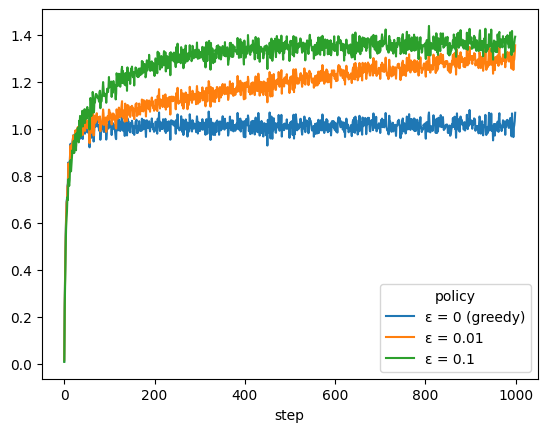

In [4]:
policy_names = {
    0: 'ε = 0.1',
    1: 'ε = 0.01',
    2: 'ε = 0 (greedy)'
}

(
    trace_df
    .assign(policy=trace_df.policy_idx.map(policy_names))
    .groupby(['step', 'policy'])
    ['reward'].mean()
    .unstack()
    .plot()
)


## Controlling the evaluation loop

The `bandit.evaluate` function is useful for benchmarking. But in practice, you'll want to have control over your bandit policy. Indeed you'll want the freedom to pull arms (with the `pull` method) and update the policy (with the `update` method) at your discretion.

As an example, the following is a possible reimplementation of the `bandit.evaluate` function. Here we'll be measuring the rate at which each policy selects the optimal arm.

Note how the `pull` and `update` methods are used.

In [5]:
import copy

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)
n_episodes = 2000

trace = []

with tqdm(total=len(policies) * n_episodes * env._max_episode_steps, position=0) as progress:
    for policy in policies:
        for episode in range(n_episodes):
            episode_policy = policy.clone()
            episode_env = copy.deepcopy(env)
            episode_env.reset()
            step = 0
            while True:
                action = episode_policy.pull(range(episode_env.action_space.n))
                observation, reward, terminated, truncated, info = episode_env.step(action)
                best_action = observation
                episode_policy.update(action, reward)

                trace.append({
                    "episode": episode,
                    "step": step,
                    "policy": f"ε = {policy.epsilon}",
                    "is_action_optimal": action == best_action
                })
                step += 1
                progress.update()

                if terminated or truncated:
                    break

trace_df = pd.DataFrame(trace)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 9994/6000000 [00:00<00:59, 99933.19it/s]

  0%|          | 20167/6000000 [00:00<00:59, 100987.61it/s]

  1%|          | 30266/6000000 [00:00<00:59, 100432.02it/s]

  1%|          | 40507/6000000 [00:00<00:58, 101208.99it/s]

  1%|          | 50759/6000000 [00:00<00:58, 101678.41it/s]

  1%|          | 61001/6000000 [00:00<00:58, 101751.98it/s]

  1%|          | 71326/6000000 [00:00<00:57, 102238.31it/s]

  1%|▏         | 81551/6000000 [00:00<00:58, 101506.68it/s]

  2%|▏         | 91813/6000000 [00:00<00:58, 101851.84it/s]

  2%|▏         | 102036/6000000 [00:01<00:57, 101967.09it/s]

  2%|▏         | 112269/6000000 [00:01<00:57, 102077.72it/s]

  2%|▏         | 122508/6000000 [00:01<00:57, 102171.67it/s]

  2%|▏         | 132726/6000000 [00:01<00:58, 100541.27it/s]

  2%|▏         | 143001/6000000 [00:01<00:57, 101060.92it/s]

  3%|▎         | 153270/6000000 [00:01<00:57, 101546.61it/s]

  3%|▎         | 163471/6000000 [00:01<00:57, 101685.12it/s]

  3%|▎         | 173743/6000000 [00:01<00:57, 101994.74it/s]

  3%|▎         | 183979/6000000 [00:01<00:56, 102101.47it/s]

  3%|▎         | 194191/6000000 [00:01<00:56, 102045.08it/s]

  3%|▎         | 204435/6000000 [00:02<00:56, 102161.54it/s]

  4%|▎         | 214652/6000000 [00:02<00:56, 102005.85it/s]

  4%|▎         | 224945/6000000 [00:02<00:56, 102281.56it/s]

  4%|▍         | 235174/6000000 [00:02<00:56, 101737.41it/s]

  4%|▍         | 245349/6000000 [00:02<00:56, 101362.39it/s]

  4%|▍         | 255625/6000000 [00:02<00:56, 101777.45it/s]

  4%|▍         | 265942/6000000 [00:02<00:56, 102192.81it/s]

  5%|▍         | 276163/6000000 [00:02<00:56, 102175.61it/s]

  5%|▍         | 286476/6000000 [00:02<00:55, 102459.80it/s]

  5%|▍         | 296723/6000000 [00:02<00:55, 102375.22it/s]

  5%|▌         | 306961/6000000 [00:03<00:55, 102352.64it/s]

  5%|▌         | 317197/6000000 [00:03<00:55, 102187.28it/s]

  5%|▌         | 327460/6000000 [00:03<00:55, 102318.02it/s]

  6%|▌         | 337719/6000000 [00:03<00:55, 102399.38it/s]

  6%|▌         | 347960/6000000 [00:03<00:55, 102230.86it/s]

  6%|▌         | 358184/6000000 [00:03<00:55, 101935.48it/s]

  6%|▌         | 368378/6000000 [00:03<00:55, 101934.90it/s]

  6%|▋         | 378575/6000000 [00:03<00:55, 101943.54it/s]

  6%|▋         | 388788/6000000 [00:03<00:55, 101997.23it/s]

  7%|▋         | 398988/6000000 [00:03<00:54, 101900.98it/s]

  7%|▋         | 409179/6000000 [00:04<00:54, 101738.26it/s]

  7%|▋         | 419356/6000000 [00:04<00:54, 101746.19it/s]

  7%|▋         | 429531/6000000 [00:04<00:54, 101368.24it/s]

  7%|▋         | 439820/6000000 [00:04<00:54, 101821.16it/s]

  8%|▊         | 450003/6000000 [00:04<00:54, 101671.80it/s]

  8%|▊         | 460228/6000000 [00:04<00:54, 101843.27it/s]

  8%|▊         | 470454/6000000 [00:04<00:54, 101967.05it/s]

  8%|▊         | 480704/6000000 [00:04<00:54, 102125.42it/s]

  8%|▊         | 490973/6000000 [00:04<00:53, 102293.05it/s]

  8%|▊         | 501203/6000000 [00:04<00:53, 102274.18it/s]

  9%|▊         | 511454/6000000 [00:05<00:53, 102343.23it/s]

  9%|▊         | 521689/6000000 [00:05<00:53, 102292.85it/s]

  9%|▉         | 531955/6000000 [00:05<00:53, 102402.07it/s]

  9%|▉         | 542196/6000000 [00:05<00:53, 102144.95it/s]

  9%|▉         | 552411/6000000 [00:05<00:53, 102067.45it/s]

  9%|▉         | 562690/6000000 [00:05<00:53, 102281.18it/s]

 10%|▉         | 572937/6000000 [00:05<00:53, 102335.29it/s]

 10%|▉         | 583171/6000000 [00:05<00:53, 101558.31it/s]

 10%|▉         | 593353/6000000 [00:05<00:53, 101636.23it/s]

 10%|█         | 603660/6000000 [00:05<00:52, 102062.89it/s]

 10%|█         | 613868/6000000 [00:06<00:53, 101510.93it/s]

 10%|█         | 624021/6000000 [00:06<00:53, 100985.59it/s]

 11%|█         | 634121/6000000 [00:06<00:53, 100881.37it/s]

 11%|█         | 644354/6000000 [00:06<00:52, 101312.63it/s]

 11%|█         | 654487/6000000 [00:06<00:53, 99446.33it/s] 

 11%|█         | 664605/6000000 [00:06<00:53, 99957.34it/s]

 11%|█         | 674718/6000000 [00:06<00:53, 100302.43it/s]

 11%|█▏        | 684888/6000000 [00:06<00:52, 100716.18it/s]

 12%|█▏        | 694964/6000000 [00:06<00:52, 100581.77it/s]

 12%|█▏        | 705025/6000000 [00:06<00:53, 99345.09it/s] 

 12%|█▏        | 715149/6000000 [00:07<00:52, 99904.57it/s]

 12%|█▏        | 725383/6000000 [00:07<00:52, 100627.06it/s]

 12%|█▏        | 735547/6000000 [00:07<00:52, 100926.63it/s]

 12%|█▏        | 745692/6000000 [00:07<00:51, 101081.49it/s]

 13%|█▎        | 755802/6000000 [00:07<00:52, 99694.80it/s] 

 13%|█▎        | 766001/6000000 [00:07<00:52, 100198.80it/s]

 13%|█▎        | 776295/6000000 [00:07<00:51, 101011.03it/s]

 13%|█▎        | 786543/6000000 [00:07<00:51, 101447.66it/s]

 13%|█▎        | 796739/6000000 [00:07<00:51, 101600.38it/s]

 13%|█▎        | 807001/6000000 [00:07<00:50, 101824.78it/s]

 14%|█▎        | 817222/6000000 [00:08<00:50, 101938.52it/s]

 14%|█▍        | 827515/6000000 [00:08<00:50, 102234.67it/s]

 14%|█▍        | 837740/6000000 [00:08<00:51, 99860.05it/s] 

 14%|█▍        | 848001/6000000 [00:08<00:51, 100525.04it/s]

 14%|█▍        | 858246/6000000 [00:08<00:50, 101094.19it/s]

 14%|█▍        | 868519/6000000 [00:08<00:50, 101579.82it/s]

 15%|█▍        | 878713/6000000 [00:08<00:50, 101685.90it/s]

 15%|█▍        | 888946/6000000 [00:08<00:50, 101875.44it/s]

 15%|█▍        | 899137/6000000 [00:08<00:50, 101844.85it/s]

 15%|█▌        | 909342/6000000 [00:08<00:49, 101905.76it/s]

 15%|█▌        | 919589/6000000 [00:09<00:49, 102073.15it/s]

 15%|█▌        | 929836/6000000 [00:09<00:49, 102189.68it/s]

 16%|█▌        | 940056/6000000 [00:09<00:49, 102025.91it/s]

 16%|█▌        | 950341/6000000 [00:09<00:49, 102271.71it/s]

 16%|█▌        | 960569/6000000 [00:09<00:49, 102133.63it/s]

 16%|█▌        | 970798/6000000 [00:09<00:49, 102180.04it/s]

 16%|█▋        | 981017/6000000 [00:09<00:49, 102157.81it/s]

 17%|█▋        | 991312/6000000 [00:09<00:48, 102394.73it/s]

 17%|█▋        | 1001636/6000000 [00:09<00:48, 102645.87it/s]

 17%|█▋        | 1011901/6000000 [00:09<00:48, 102620.44it/s]

 17%|█▋        | 1022164/6000000 [00:10<00:48, 102194.65it/s]

 17%|█▋        | 1032434/6000000 [00:10<00:48, 102343.96it/s]

 17%|█▋        | 1042671/6000000 [00:10<00:48, 102349.37it/s]

 18%|█▊        | 1052942/6000000 [00:10<00:48, 102456.39it/s]

 18%|█▊        | 1063188/6000000 [00:10<00:49, 100678.25it/s]

 18%|█▊        | 1073456/6000000 [00:10<00:48, 101268.83it/s]

 18%|█▊        | 1083762/6000000 [00:10<00:48, 101799.41it/s]

 18%|█▊        | 1093984/6000000 [00:10<00:48, 101922.34it/s]

 18%|█▊        | 1104180/6000000 [00:10<00:48, 101765.51it/s]

 19%|█▊        | 1114423/6000000 [00:10<00:47, 101961.55it/s]

 19%|█▊        | 1124709/6000000 [00:11<00:47, 102230.07it/s]

 19%|█▉        | 1134980/6000000 [00:11<00:47, 102371.73it/s]

 19%|█▉        | 1145219/6000000 [00:11<00:47, 102353.84it/s]

 19%|█▉        | 1155460/6000000 [00:11<00:47, 102368.65it/s]

 19%|█▉        | 1165698/6000000 [00:11<00:47, 102332.08it/s]

 20%|█▉        | 1176001/6000000 [00:11<00:47, 102365.15it/s]

 20%|█▉        | 1186246/6000000 [00:11<00:47, 102389.27it/s]

 20%|█▉        | 1196517/6000000 [00:11<00:46, 102483.49it/s]

 20%|██        | 1206804/6000000 [00:11<00:46, 102596.80it/s]

 20%|██        | 1217064/6000000 [00:11<00:46, 102397.97it/s]

 20%|██        | 1227304/6000000 [00:12<00:46, 101891.72it/s]

 21%|██        | 1237494/6000000 [00:12<00:46, 101595.46it/s]

 21%|██        | 1247655/6000000 [00:12<00:46, 101338.49it/s]

 21%|██        | 1257790/6000000 [00:12<00:46, 101122.58it/s]

 21%|██        | 1267903/6000000 [00:12<00:46, 100968.24it/s]

 21%|██▏       | 1278000/6000000 [00:12<00:46, 100933.95it/s]

 21%|██▏       | 1288094/6000000 [00:12<00:46, 100543.07it/s]

 22%|██▏       | 1298196/6000000 [00:12<00:46, 100678.47it/s]

 22%|██▏       | 1308265/6000000 [00:12<00:46, 99935.09it/s] 

 22%|██▏       | 1318347/6000000 [00:12<00:46, 100197.45it/s]

 22%|██▏       | 1328468/6000000 [00:13<00:46, 100499.28it/s]

 22%|██▏       | 1338575/6000000 [00:13<00:46, 100669.22it/s]

 22%|██▏       | 1348687/6000000 [00:13<00:46, 100803.69it/s]

 23%|██▎       | 1358768/6000000 [00:13<00:46, 100802.80it/s]

 23%|██▎       | 1368849/6000000 [00:13<00:46, 100352.04it/s]

 23%|██▎       | 1378949/6000000 [00:13<00:45, 100542.94it/s]

 23%|██▎       | 1389004/6000000 [00:13<00:45, 100433.84it/s]

 23%|██▎       | 1399048/6000000 [00:13<00:45, 100398.04it/s]

 23%|██▎       | 1409089/6000000 [00:13<00:45, 100332.05it/s]

 24%|██▎       | 1419203/6000000 [00:13<00:45, 100572.54it/s]

 24%|██▍       | 1429277/6000000 [00:14<00:45, 100620.43it/s]

 24%|██▍       | 1439340/6000000 [00:14<00:45, 100394.21it/s]

 24%|██▍       | 1449380/6000000 [00:14<00:45, 100383.94it/s]

 24%|██▍       | 1459419/6000000 [00:14<00:45, 100289.04it/s]

 24%|██▍       | 1469485/6000000 [00:14<00:45, 100399.07it/s]

 25%|██▍       | 1479606/6000000 [00:14<00:44, 100639.61it/s]

 25%|██▍       | 1489680/6000000 [00:14<00:44, 100668.08it/s]

 25%|██▍       | 1499747/6000000 [00:14<00:44, 100610.14it/s]

 25%|██▌       | 1509809/6000000 [00:14<00:44, 100570.36it/s]

 25%|██▌       | 1519867/6000000 [00:14<00:44, 100425.23it/s]

 25%|██▌       | 1529910/6000000 [00:15<00:44, 100271.24it/s]

 26%|██▌       | 1539940/6000000 [00:15<00:44, 100276.87it/s]

 26%|██▌       | 1549968/6000000 [00:15<00:44, 100096.71it/s]

 26%|██▌       | 1559978/6000000 [00:15<00:44, 99969.11it/s] 

 26%|██▌       | 1569975/6000000 [00:15<00:44, 99929.91it/s]

 26%|██▋       | 1580024/6000000 [00:15<00:44, 100096.83it/s]

 27%|██▋       | 1590103/6000000 [00:15<00:43, 100302.64it/s]

 27%|██▋       | 1600134/6000000 [00:15<00:43, 100159.46it/s]

 27%|██▋       | 1610254/6000000 [00:15<00:43, 100470.39it/s]

 27%|██▋       | 1620378/6000000 [00:15<00:43, 100700.01it/s]

 27%|██▋       | 1630449/6000000 [00:16<00:43, 100582.49it/s]

 27%|██▋       | 1640508/6000000 [00:16<00:43, 100537.81it/s]

 28%|██▊       | 1650562/6000000 [00:16<00:43, 100276.91it/s]

 28%|██▊       | 1660590/6000000 [00:16<00:43, 100136.30it/s]

 28%|██▊       | 1670604/6000000 [00:16<00:43, 100092.82it/s]

 28%|██▊       | 1680639/6000000 [00:16<00:43, 100169.39it/s]

 28%|██▊       | 1690736/6000000 [00:16<00:42, 100408.56it/s]

 28%|██▊       | 1700777/6000000 [00:16<00:42, 100324.16it/s]

 29%|██▊       | 1710834/6000000 [00:16<00:42, 100395.83it/s]

 29%|██▊       | 1720874/6000000 [00:16<00:42, 100134.30it/s]

 29%|██▉       | 1730984/6000000 [00:17<00:42, 100420.80it/s]

 29%|██▉       | 1741027/6000000 [00:17<00:42, 100356.16it/s]

 29%|██▉       | 1751092/6000000 [00:17<00:42, 100443.83it/s]

 29%|██▉       | 1761137/6000000 [00:17<00:42, 100391.85it/s]

 30%|██▉       | 1771214/6000000 [00:17<00:42, 100502.02it/s]

 30%|██▉       | 1781265/6000000 [00:17<00:42, 99400.22it/s] 

 30%|██▉       | 1791302/6000000 [00:17<00:42, 99686.85it/s]

 30%|███       | 1801403/6000000 [00:17<00:41, 100078.08it/s]

 30%|███       | 1811444/6000000 [00:17<00:41, 100175.20it/s]

 30%|███       | 1821500/6000000 [00:17<00:41, 100289.62it/s]

 31%|███       | 1831564/6000000 [00:18<00:41, 100391.97it/s]

 31%|███       | 1841604/6000000 [00:18<00:41, 100356.56it/s]

 31%|███       | 1851641/6000000 [00:18<00:41, 100300.57it/s]

 31%|███       | 1861693/6000000 [00:18<00:41, 100363.91it/s]

 31%|███       | 1871788/6000000 [00:18<00:41, 100538.38it/s]

 31%|███▏      | 1881857/6000000 [00:18<00:40, 100582.86it/s]

 32%|███▏      | 1891916/6000000 [00:18<00:40, 100508.93it/s]

 32%|███▏      | 1902001/6000000 [00:18<00:40, 100544.37it/s]

 32%|███▏      | 1912056/6000000 [00:18<00:40, 100541.70it/s]

 32%|███▏      | 1922111/6000000 [00:18<00:40, 100475.86it/s]

 32%|███▏      | 1932172/6000000 [00:19<00:40, 100515.87it/s]

 32%|███▏      | 1942264/6000000 [00:19<00:40, 100634.32it/s]

 33%|███▎      | 1952342/6000000 [00:19<00:40, 100677.17it/s]

 33%|███▎      | 1962410/6000000 [00:19<00:40, 100602.23it/s]

 33%|███▎      | 1972471/6000000 [00:19<00:40, 100310.72it/s]

 33%|███▎      | 1982503/6000000 [00:19<00:40, 100213.51it/s]

 33%|███▎      | 1992570/6000000 [00:19<00:39, 100346.20it/s]

 33%|███▎      | 2002605/6000000 [00:19<00:40, 99868.28it/s] 

 34%|███▎      | 2012593/6000000 [00:19<00:40, 97945.00it/s]

 34%|███▎      | 2022396/6000000 [00:19<00:41, 96977.92it/s]

 34%|███▍      | 2032100/6000000 [00:20<00:41, 95554.44it/s]

 34%|███▍      | 2041663/6000000 [00:20<00:41, 95105.25it/s]

 34%|███▍      | 2051178/6000000 [00:20<00:41, 94903.65it/s]

 34%|███▍      | 2060671/6000000 [00:20<00:41, 94528.01it/s]

 35%|███▍      | 2070126/6000000 [00:20<00:41, 94471.30it/s]

 35%|███▍      | 2079610/6000000 [00:20<00:41, 94580.54it/s]

 35%|███▍      | 2089069/6000000 [00:20<00:41, 94437.19it/s]

 35%|███▍      | 2098638/6000000 [00:20<00:41, 94809.41it/s]

 35%|███▌      | 2108127/6000000 [00:20<00:41, 94833.24it/s]

 35%|███▌      | 2117647/6000000 [00:21<00:40, 94940.05it/s]

 35%|███▌      | 2127175/6000000 [00:21<00:40, 95039.20it/s]

 36%|███▌      | 2136680/6000000 [00:21<00:40, 94753.44it/s]

 36%|███▌      | 2146156/6000000 [00:21<00:40, 94324.35it/s]

 36%|███▌      | 2155690/6000000 [00:21<00:40, 94626.82it/s]

 36%|███▌      | 2165154/6000000 [00:21<00:40, 94435.78it/s]

 36%|███▌      | 2174598/6000000 [00:21<00:40, 94314.66it/s]

 36%|███▋      | 2184030/6000000 [00:21<00:40, 94242.48it/s]

 37%|███▋      | 2193455/6000000 [00:21<00:41, 91108.17it/s]

 37%|███▋      | 2202924/6000000 [00:21<00:41, 92153.80it/s]

 37%|███▋      | 2212158/6000000 [00:22<00:41, 92166.34it/s]

 37%|███▋      | 2221672/6000000 [00:22<00:40, 93043.95it/s]

 37%|███▋      | 2231051/6000000 [00:22<00:40, 93264.80it/s]

 37%|███▋      | 2240391/6000000 [00:22<00:40, 93303.00it/s]

 37%|███▋      | 2249857/6000000 [00:22<00:40, 93706.87it/s]

 38%|███▊      | 2259448/6000000 [00:22<00:39, 94363.83it/s]

 38%|███▊      | 2268944/6000000 [00:22<00:39, 94541.56it/s]

 38%|███▊      | 2278401/6000000 [00:22<00:39, 94532.49it/s]

 38%|███▊      | 2287941/6000000 [00:22<00:39, 94791.50it/s]

 38%|███▊      | 2297422/6000000 [00:22<00:39, 94671.84it/s]

 38%|███▊      | 2306890/6000000 [00:23<00:39, 94526.07it/s]

 39%|███▊      | 2316357/6000000 [00:23<00:38, 94566.75it/s]

 39%|███▉      | 2325957/6000000 [00:23<00:38, 94995.34it/s]

 39%|███▉      | 2335457/6000000 [00:23<00:38, 94589.04it/s]

 39%|███▉      | 2345001/6000000 [00:23<00:38, 94752.05it/s]

 39%|███▉      | 2354500/6000000 [00:23<00:38, 94820.52it/s]

 39%|███▉      | 2364059/6000000 [00:23<00:38, 95048.61it/s]

 40%|███▉      | 2373565/6000000 [00:23<00:38, 94791.18it/s]

 40%|███▉      | 2383045/6000000 [00:23<00:38, 94348.35it/s]

 40%|███▉      | 2392491/6000000 [00:23<00:38, 94381.15it/s]

 40%|████      | 2402019/6000000 [00:24<00:38, 94649.26it/s]

 40%|████      | 2411551/6000000 [00:24<00:37, 94849.50it/s]

 40%|████      | 2421201/6000000 [00:24<00:37, 95342.11it/s]

 41%|████      | 2430736/6000000 [00:24<00:37, 95216.70it/s]

 41%|████      | 2440258/6000000 [00:24<00:37, 94744.24it/s]

 41%|████      | 2449734/6000000 [00:24<00:37, 94523.50it/s]

 41%|████      | 2459187/6000000 [00:24<00:37, 94238.29it/s]

 41%|████      | 2468743/6000000 [00:24<00:37, 94632.19it/s]

 41%|████▏     | 2478207/6000000 [00:24<00:37, 94460.59it/s]

 41%|████▏     | 2487689/6000000 [00:24<00:37, 94567.19it/s]

 42%|████▏     | 2497147/6000000 [00:25<00:37, 94471.60it/s]

 42%|████▏     | 2506676/6000000 [00:25<00:36, 94716.41it/s]

 42%|████▏     | 2516148/6000000 [00:25<00:36, 94669.19it/s]

 42%|████▏     | 2525616/6000000 [00:25<00:36, 94287.15it/s]

 42%|████▏     | 2535102/6000000 [00:25<00:36, 94449.59it/s]

 42%|████▏     | 2544636/6000000 [00:25<00:36, 94714.96it/s]

 43%|████▎     | 2554108/6000000 [00:25<00:36, 93939.41it/s]

 43%|████▎     | 2563553/6000000 [00:25<00:36, 94090.31it/s]

 43%|████▎     | 2572964/6000000 [00:25<00:36, 94054.31it/s]

 43%|████▎     | 2582383/6000000 [00:25<00:36, 94094.49it/s]

 43%|████▎     | 2591840/6000000 [00:26<00:36, 94235.03it/s]

 43%|████▎     | 2601264/6000000 [00:26<00:36, 94226.93it/s]

 44%|████▎     | 2610688/6000000 [00:26<00:36, 94137.61it/s]

 44%|████▎     | 2620102/6000000 [00:26<00:36, 93792.84it/s]

 44%|████▍     | 2629582/6000000 [00:26<00:35, 94091.27it/s]

 44%|████▍     | 2638992/6000000 [00:26<00:35, 94067.54it/s]

 44%|████▍     | 2648400/6000000 [00:26<00:35, 93162.13it/s]

 44%|████▍     | 2657940/6000000 [00:26<00:35, 93826.94it/s]

 44%|████▍     | 2667325/6000000 [00:26<00:35, 93826.24it/s]

 45%|████▍     | 2676709/6000000 [00:26<00:35, 93604.21it/s]

 45%|████▍     | 2686150/6000000 [00:27<00:35, 93844.54it/s]

 45%|████▍     | 2695536/6000000 [00:27<00:35, 93755.74it/s]

 45%|████▌     | 2704995/6000000 [00:27<00:35, 94003.97it/s]

 45%|████▌     | 2714425/6000000 [00:27<00:34, 94091.21it/s]

 45%|████▌     | 2723856/6000000 [00:27<00:34, 94154.63it/s]

 46%|████▌     | 2733358/6000000 [00:27<00:34, 94413.93it/s]

 46%|████▌     | 2742800/6000000 [00:27<00:35, 91757.20it/s]

 46%|████▌     | 2752106/6000000 [00:27<00:35, 92138.42it/s]

 46%|████▌     | 2761449/6000000 [00:27<00:35, 92518.27it/s]

 46%|████▌     | 2770918/6000000 [00:27<00:34, 93161.84it/s]

 46%|████▋     | 2780385/6000000 [00:28<00:34, 93608.44it/s]

 46%|████▋     | 2789862/6000000 [00:28<00:34, 93952.98it/s]

 47%|████▋     | 2799262/6000000 [00:28<00:34, 93911.51it/s]

 47%|████▋     | 2808669/6000000 [00:28<00:33, 93957.20it/s]

 47%|████▋     | 2818067/6000000 [00:28<00:33, 93963.72it/s]

 47%|████▋     | 2827465/6000000 [00:28<00:33, 93936.42it/s]

 47%|████▋     | 2836860/6000000 [00:28<00:34, 92669.54it/s]

 47%|████▋     | 2846343/6000000 [00:28<00:33, 93308.34it/s]

 48%|████▊     | 2855678/6000000 [00:28<00:33, 93183.55it/s]

 48%|████▊     | 2865001/6000000 [00:28<00:33, 93091.68it/s]

 48%|████▊     | 2874483/6000000 [00:29<00:33, 93605.02it/s]

 48%|████▊     | 2883845/6000000 [00:29<00:33, 93503.30it/s]

 48%|████▊     | 2893268/6000000 [00:29<00:33, 93719.75it/s]

 48%|████▊     | 2902641/6000000 [00:29<00:33, 93668.44it/s]

 49%|████▊     | 2912063/6000000 [00:29<00:32, 93832.26it/s]

 49%|████▊     | 2921515/6000000 [00:29<00:32, 94037.57it/s]

 49%|████▉     | 2930920/6000000 [00:29<00:32, 93937.75it/s]

 49%|████▉     | 2940315/6000000 [00:29<00:33, 92037.88it/s]

 49%|████▉     | 2949845/6000000 [00:29<00:32, 93000.46it/s]

 49%|████▉     | 2959276/6000000 [00:29<00:32, 93388.85it/s]

 49%|████▉     | 2968724/6000000 [00:30<00:32, 93713.61it/s]

 50%|████▉     | 2978100/6000000 [00:30<00:32, 93570.51it/s]

 50%|████▉     | 2987540/6000000 [00:30<00:32, 93816.50it/s]

 50%|████▉     | 2996924/6000000 [00:30<00:32, 93607.97it/s]

 50%|█████     | 3006300/6000000 [00:30<00:31, 93651.42it/s]

 50%|█████     | 3015667/6000000 [00:30<00:31, 93555.11it/s]

 50%|█████     | 3025024/6000000 [00:30<00:31, 93213.19it/s]

 51%|█████     | 3034347/6000000 [00:30<00:31, 92891.96it/s]

 51%|█████     | 3043725/6000000 [00:30<00:31, 93155.51it/s]

 51%|█████     | 3053042/6000000 [00:30<00:32, 91111.35it/s]

 51%|█████     | 3062500/6000000 [00:31<00:31, 92132.61it/s]

 51%|█████     | 3072043/6000000 [00:31<00:31, 93106.65it/s]

 51%|█████▏    | 3081694/6000000 [00:31<00:31, 94115.52it/s]

 52%|█████▏    | 3091112/6000000 [00:31<00:30, 93961.14it/s]

 52%|█████▏    | 3100636/6000000 [00:31<00:30, 94340.00it/s]

 52%|█████▏    | 3110074/6000000 [00:31<00:30, 94145.89it/s]

 52%|█████▏    | 3119512/6000000 [00:31<00:30, 94215.77it/s]

 52%|█████▏    | 3128936/6000000 [00:31<00:30, 93882.03it/s]

 52%|█████▏    | 3138326/6000000 [00:31<00:30, 93690.06it/s]

 52%|█████▏    | 3147832/6000000 [00:31<00:30, 94098.99it/s]

 53%|█████▎    | 3157392/6000000 [00:32<00:30, 94545.46it/s]

 53%|█████▎    | 3166900/6000000 [00:32<00:29, 94703.38it/s]

 53%|█████▎    | 3176371/6000000 [00:32<00:29, 94431.01it/s]

 53%|█████▎    | 3185851/6000000 [00:32<00:29, 94540.37it/s]

 53%|█████▎    | 3195306/6000000 [00:32<00:29, 94445.08it/s]

 53%|█████▎    | 3204789/6000000 [00:32<00:29, 94559.24it/s]

 54%|█████▎    | 3214246/6000000 [00:32<00:29, 94323.17it/s]

 54%|█████▎    | 3223679/6000000 [00:32<00:29, 93994.09it/s]

 54%|█████▍    | 3233131/6000000 [00:32<00:29, 94148.83it/s]

 54%|█████▍    | 3242597/6000000 [00:32<00:29, 94299.64it/s]

 54%|█████▍    | 3252028/6000000 [00:33<00:29, 93946.42it/s]

 54%|█████▍    | 3261447/6000000 [00:33<00:29, 94016.60it/s]

 55%|█████▍    | 3270868/6000000 [00:33<00:29, 94072.53it/s]

 55%|█████▍    | 3280368/6000000 [00:33<00:28, 94347.39it/s]

 55%|█████▍    | 3289936/6000000 [00:33<00:28, 94746.54it/s]

 55%|█████▍    | 3299411/6000000 [00:33<00:28, 94637.31it/s]

 55%|█████▌    | 3308875/6000000 [00:33<00:28, 94550.77it/s]

 55%|█████▌    | 3318331/6000000 [00:33<00:28, 94106.79it/s]

 55%|█████▌    | 3327773/6000000 [00:33<00:28, 94198.41it/s]

 56%|█████▌    | 3337194/6000000 [00:33<00:28, 94058.59it/s]

 56%|█████▌    | 3346711/6000000 [00:34<00:28, 94388.38it/s]

 56%|█████▌    | 3356151/6000000 [00:34<00:28, 94168.66it/s]

 56%|█████▌    | 3365569/6000000 [00:34<00:28, 94006.74it/s]

 56%|█████▌    | 3374970/6000000 [00:34<00:28, 93685.63it/s]

 56%|█████▋    | 3384393/6000000 [00:34<00:27, 93846.44it/s]

 57%|█████▋    | 3393778/6000000 [00:34<00:27, 93732.01it/s]

 57%|█████▋    | 3403380/6000000 [00:34<00:27, 94415.99it/s]

 57%|█████▋    | 3412844/6000000 [00:34<00:27, 94480.78it/s]

 57%|█████▋    | 3422293/6000000 [00:34<00:27, 94341.69it/s]

 57%|█████▋    | 3431900/6000000 [00:34<00:27, 94856.77it/s]

 57%|█████▋    | 3441386/6000000 [00:35<00:27, 94636.70it/s]

 58%|█████▊    | 3450850/6000000 [00:35<00:26, 94464.13it/s]

 58%|█████▊    | 3460297/6000000 [00:35<00:26, 94271.06it/s]

 58%|█████▊    | 3469725/6000000 [00:35<00:26, 94018.36it/s]

 58%|█████▊    | 3479128/6000000 [00:35<00:26, 93703.26it/s]

 58%|█████▊    | 3488606/6000000 [00:35<00:26, 94018.45it/s]

 58%|█████▊    | 3498023/6000000 [00:35<00:26, 94061.48it/s]

 58%|█████▊    | 3507485/6000000 [00:35<00:26, 94227.46it/s]

 59%|█████▊    | 3517001/6000000 [00:35<00:26, 94349.57it/s]

 59%|█████▉    | 3526437/6000000 [00:35<00:26, 94315.37it/s]

 59%|█████▉    | 3535881/6000000 [00:36<00:26, 94351.70it/s]

 59%|█████▉    | 3545317/6000000 [00:36<00:26, 94220.03it/s]

 59%|█████▉    | 3554807/6000000 [00:36<00:25, 94422.43it/s]

 59%|█████▉    | 3564251/6000000 [00:36<00:25, 94424.89it/s]

 60%|█████▉    | 3573694/6000000 [00:36<00:25, 94421.92it/s]

 60%|█████▉    | 3583137/6000000 [00:36<00:25, 94017.03it/s]

 60%|█████▉    | 3592563/6000000 [00:36<00:25, 94088.95it/s]

 60%|██████    | 3601973/6000000 [00:36<00:26, 91949.14it/s]

 60%|██████    | 3611377/6000000 [00:36<00:25, 92562.54it/s]

 60%|██████    | 3620747/6000000 [00:37<00:25, 92898.28it/s]

 61%|██████    | 3630075/6000000 [00:37<00:25, 93010.43it/s]

 61%|██████    | 3639602/6000000 [00:37<00:25, 93681.66it/s]

 61%|██████    | 3649160/6000000 [00:37<00:24, 94248.17it/s]

 61%|██████    | 3658619/6000000 [00:37<00:24, 94348.75it/s]

 61%|██████    | 3668056/6000000 [00:37<00:24, 94040.49it/s]

 61%|██████▏   | 3677679/6000000 [00:37<00:24, 94694.03it/s]

 61%|██████▏   | 3687150/6000000 [00:37<00:24, 94445.73it/s]

 62%|██████▏   | 3696596/6000000 [00:37<00:25, 92112.01it/s]

 62%|██████▏   | 3706119/6000000 [00:37<00:24, 93027.10it/s]

 62%|██████▏   | 3715509/6000000 [00:38<00:24, 93282.92it/s]

 62%|██████▏   | 3724900/6000000 [00:38<00:24, 93468.01it/s]

 62%|██████▏   | 3734256/6000000 [00:38<00:24, 93495.31it/s]

 62%|██████▏   | 3743710/6000000 [00:38<00:24, 93806.20it/s]

 63%|██████▎   | 3753094/6000000 [00:38<00:24, 93602.03it/s]

 63%|██████▎   | 3762637/6000000 [00:38<00:23, 94146.64it/s]

 63%|██████▎   | 3772054/6000000 [00:38<00:23, 94029.05it/s]

 63%|██████▎   | 3781459/6000000 [00:38<00:23, 93392.13it/s]

 63%|██████▎   | 3790800/6000000 [00:38<00:23, 92325.04it/s]

 63%|██████▎   | 3800190/6000000 [00:38<00:23, 92791.42it/s]

 63%|██████▎   | 3809700/6000000 [00:39<00:23, 93477.71it/s]

 64%|██████▎   | 3819115/6000000 [00:39<00:23, 93677.42it/s]

 64%|██████▍   | 3828583/6000000 [00:39<00:23, 93975.74it/s]

 64%|██████▍   | 3838066/6000000 [00:39<00:22, 94230.57it/s]

 64%|██████▍   | 3847491/6000000 [00:39<00:22, 94082.12it/s]

 64%|██████▍   | 3856901/6000000 [00:39<00:22, 93808.72it/s]

 64%|██████▍   | 3866344/6000000 [00:39<00:22, 93993.12it/s]

 65%|██████▍   | 3875840/6000000 [00:39<00:22, 94281.40it/s]

 65%|██████▍   | 3885269/6000000 [00:39<00:22, 93780.83it/s]

 65%|██████▍   | 3894648/6000000 [00:39<00:22, 91721.03it/s]

 65%|██████▌   | 3903912/6000000 [00:40<00:22, 91989.50it/s]

 65%|██████▌   | 3913218/6000000 [00:40<00:22, 92305.12it/s]

 65%|██████▌   | 3922670/6000000 [00:40<00:22, 92960.70it/s]

 66%|██████▌   | 3932171/6000000 [00:40<00:22, 93570.43it/s]

 66%|██████▌   | 3941716/6000000 [00:40<00:21, 94129.96it/s]

 66%|██████▌   | 3951187/6000000 [00:40<00:21, 94302.48it/s]

 66%|██████▌   | 3960691/6000000 [00:40<00:21, 94520.83it/s]

 66%|██████▌   | 3970145/6000000 [00:40<00:21, 94445.06it/s]

 66%|██████▋   | 3979591/6000000 [00:40<00:21, 94448.08it/s]

 66%|██████▋   | 3989037/6000000 [00:40<00:21, 94243.24it/s]

 67%|██████▋   | 3998462/6000000 [00:41<00:21, 93822.06it/s]

 67%|██████▋   | 4008190/6000000 [00:41<00:20, 94853.24it/s]

 67%|██████▋   | 4017765/6000000 [00:41<00:20, 95120.37it/s]

 67%|██████▋   | 4027361/6000000 [00:41<00:20, 95369.98it/s]

 67%|██████▋   | 4037001/6000000 [00:41<00:20, 95658.00it/s]

 67%|██████▋   | 4046568/6000000 [00:41<00:20, 95605.76it/s]

 68%|██████▊   | 4056333/6000000 [00:41<00:20, 96217.55it/s]

 68%|██████▊   | 4066001/6000000 [00:41<00:20, 96324.93it/s]

 68%|██████▊   | 4075634/6000000 [00:41<00:20, 96134.94it/s]

 68%|██████▊   | 4085248/6000000 [00:41<00:20, 93734.64it/s]

 68%|██████▊   | 4095038/6000000 [00:42<00:20, 94959.45it/s]

 68%|██████▊   | 4104850/6000000 [00:42<00:19, 95893.25it/s]

 69%|██████▊   | 4114518/6000000 [00:42<00:19, 96123.74it/s]

 69%|██████▊   | 4124138/6000000 [00:42<00:19, 96075.91it/s]

 69%|██████▉   | 4133826/6000000 [00:42<00:19, 96315.78it/s]

 69%|██████▉   | 4143461/6000000 [00:42<00:19, 96181.54it/s]

 69%|██████▉   | 4153135/6000000 [00:42<00:19, 96347.34it/s]

 69%|██████▉   | 4162772/6000000 [00:42<00:19, 96343.56it/s]

 70%|██████▉   | 4172600/6000000 [00:42<00:18, 96922.62it/s]

 70%|██████▉   | 4182294/6000000 [00:42<00:19, 95211.36it/s]

 70%|██████▉   | 4191969/6000000 [00:43<00:18, 95666.07it/s]

 70%|███████   | 4201726/6000000 [00:43<00:18, 96230.14it/s]

 70%|███████   | 4211354/6000000 [00:43<00:18, 95909.13it/s]

 70%|███████   | 4220949/6000000 [00:43<00:18, 95691.36it/s]

 71%|███████   | 4230521/6000000 [00:43<00:18, 95664.44it/s]

 71%|███████   | 4240121/6000000 [00:43<00:18, 95761.51it/s]

 71%|███████   | 4249816/6000000 [00:43<00:18, 96114.86it/s]

 71%|███████   | 4259429/6000000 [00:43<00:18, 95877.45it/s]

 71%|███████   | 4269034/6000000 [00:43<00:18, 95926.33it/s]

 71%|███████▏  | 4278688/6000000 [00:43<00:17, 96109.05it/s]

 71%|███████▏  | 4288452/6000000 [00:44<00:17, 96567.50it/s]

 72%|███████▏  | 4298131/6000000 [00:44<00:17, 96633.51it/s]

 72%|███████▏  | 4307852/6000000 [00:44<00:17, 96804.81it/s]

 72%|███████▏  | 4317533/6000000 [00:44<00:17, 96427.01it/s]

 72%|███████▏  | 4327177/6000000 [00:44<00:17, 96105.31it/s]

 72%|███████▏  | 4336796/6000000 [00:44<00:17, 96130.01it/s]

 72%|███████▏  | 4346715/6000000 [00:44<00:17, 97044.94it/s]

 73%|███████▎  | 4356431/6000000 [00:44<00:16, 97078.58it/s]

 73%|███████▎  | 4366140/6000000 [00:44<00:16, 96799.30it/s]

 73%|███████▎  | 4375821/6000000 [00:44<00:17, 93655.28it/s]

 73%|███████▎  | 4385552/6000000 [00:45<00:17, 94721.83it/s]

 73%|███████▎  | 4395065/6000000 [00:45<00:16, 94840.20it/s]

 73%|███████▎  | 4404805/6000000 [00:45<00:16, 95596.53it/s]

 74%|███████▎  | 4414375/6000000 [00:45<00:16, 95283.35it/s]

 74%|███████▎  | 4424001/6000000 [00:45<00:16, 95501.24it/s]

 74%|███████▍  | 4433634/6000000 [00:45<00:16, 95746.20it/s]

 74%|███████▍  | 4443213/6000000 [00:45<00:16, 95610.24it/s]

 74%|███████▍  | 4452923/6000000 [00:45<00:16, 96054.22it/s]

 74%|███████▍  | 4462532/6000000 [00:45<00:16, 96062.69it/s]

 75%|███████▍  | 4472140/6000000 [00:45<00:15, 95772.27it/s]

 75%|███████▍  | 4481802/6000000 [00:46<00:15, 96022.40it/s]

 75%|███████▍  | 4491406/6000000 [00:46<00:15, 95997.29it/s]

 75%|███████▌  | 4501045/6000000 [00:46<00:15, 96113.65it/s]

 75%|███████▌  | 4510674/6000000 [00:46<00:15, 96164.93it/s]

 75%|███████▌  | 4520291/6000000 [00:46<00:15, 96129.11it/s]

 76%|███████▌  | 4530080/6000000 [00:46<00:15, 96655.85it/s]

 76%|███████▌  | 4539746/6000000 [00:46<00:15, 96628.11it/s]

 76%|███████▌  | 4549409/6000000 [00:46<00:15, 96227.04it/s]

 76%|███████▌  | 4559163/6000000 [00:46<00:14, 96618.03it/s]

 76%|███████▌  | 4568826/6000000 [00:46<00:15, 92976.44it/s]

 76%|███████▋  | 4578405/6000000 [00:47<00:15, 93796.14it/s]

 76%|███████▋  | 4588278/6000000 [00:47<00:14, 95246.61it/s]

 77%|███████▋  | 4598001/6000000 [00:47<00:14, 95675.59it/s]

 77%|███████▋  | 4607583/6000000 [00:47<00:14, 95577.10it/s]

 77%|███████▋  | 4617318/6000000 [00:47<00:14, 96102.95it/s]

 77%|███████▋  | 4627001/6000000 [00:47<00:14, 96166.83it/s]

 77%|███████▋  | 4636623/6000000 [00:47<00:14, 96032.16it/s]

 77%|███████▋  | 4646420/6000000 [00:47<00:14, 96609.03it/s]

 78%|███████▊  | 4656084/6000000 [00:47<00:13, 96469.04it/s]

 78%|███████▊  | 4665770/6000000 [00:47<00:13, 96585.19it/s]

 78%|███████▊  | 4675430/6000000 [00:48<00:14, 93189.20it/s]

 78%|███████▊  | 4685001/6000000 [00:48<00:14, 93823.19it/s]

 78%|███████▊  | 4694660/6000000 [00:48<00:13, 94635.85it/s]

 78%|███████▊  | 4704371/6000000 [00:48<00:13, 95366.97it/s]

 79%|███████▊  | 4713970/6000000 [00:48<00:13, 95550.68it/s]

 79%|███████▊  | 4723534/6000000 [00:48<00:13, 95505.81it/s]

 79%|███████▉  | 4733091/6000000 [00:48<00:13, 95433.19it/s]

 79%|███████▉  | 4742656/6000000 [00:48<00:13, 95496.35it/s]

 79%|███████▉  | 4752218/6000000 [00:48<00:13, 95531.31it/s]

 79%|███████▉  | 4761774/6000000 [00:49<00:12, 95385.39it/s]

 80%|███████▉  | 4771314/6000000 [00:49<00:12, 95186.22it/s]

 80%|███████▉  | 4780845/6000000 [00:49<00:12, 95221.83it/s]

 80%|███████▉  | 4790486/6000000 [00:49<00:12, 95576.10it/s]

 80%|████████  | 4800107/6000000 [00:49<00:12, 95763.45it/s]

 80%|████████  | 4809745/6000000 [00:49<00:12, 95945.83it/s]

 80%|████████  | 4819413/6000000 [00:49<00:12, 96164.61it/s]

 80%|████████  | 4829174/6000000 [00:49<00:12, 96596.48it/s]

 81%|████████  | 4838864/6000000 [00:49<00:12, 96687.04it/s]

 81%|████████  | 4848533/6000000 [00:49<00:11, 96648.01it/s]

 81%|████████  | 4858198/6000000 [00:50<00:11, 96230.77it/s]

 81%|████████  | 4867822/6000000 [00:50<00:12, 92980.22it/s]

 81%|████████▏ | 4877498/6000000 [00:50<00:11, 94082.72it/s]

 81%|████████▏ | 4887141/6000000 [00:50<00:11, 94771.88it/s]

 82%|████████▏ | 4896890/6000000 [00:50<00:11, 95574.68it/s]

 82%|████████▏ | 4906562/6000000 [00:50<00:11, 95915.07it/s]

 82%|████████▏ | 4916162/6000000 [00:50<00:11, 95740.86it/s]

 82%|████████▏ | 4926059/6000000 [00:50<00:11, 96703.70it/s]

 82%|████████▏ | 4935865/6000000 [00:50<00:10, 97108.71it/s]

 82%|████████▏ | 4945580/6000000 [00:50<00:10, 97027.74it/s]

 83%|████████▎ | 4955295/6000000 [00:51<00:10, 97062.41it/s]

 83%|████████▎ | 4965003/6000000 [00:51<00:10, 94325.09it/s]

 83%|████████▎ | 4974569/6000000 [00:51<00:10, 94715.54it/s]

 83%|████████▎ | 4984156/6000000 [00:51<00:10, 95056.24it/s]

 83%|████████▎ | 4993881/6000000 [00:51<00:10, 95705.69it/s]

 83%|████████▎ | 5003568/6000000 [00:51<00:10, 96052.21it/s]

 84%|████████▎ | 5013179/6000000 [00:51<00:10, 96020.02it/s]

 84%|████████▎ | 5022785/6000000 [00:51<00:10, 95858.75it/s]

 84%|████████▍ | 5032374/6000000 [00:51<00:10, 95642.67it/s]

 84%|████████▍ | 5042117/6000000 [00:51<00:09, 96174.02it/s]

 84%|████████▍ | 5051774/6000000 [00:52<00:09, 96292.33it/s]

 84%|████████▍ | 5061405/6000000 [00:52<00:10, 92910.93it/s]

 85%|████████▍ | 5071003/6000000 [00:52<00:09, 93807.03it/s]

 85%|████████▍ | 5080585/6000000 [00:52<00:09, 94396.97it/s]

 85%|████████▍ | 5090194/6000000 [00:52<00:09, 94897.90it/s]

 85%|████████▍ | 5099970/6000000 [00:52<00:09, 95747.40it/s]

 85%|████████▌ | 5109594/6000000 [00:52<00:09, 95894.11it/s]

 85%|████████▌ | 5119230/6000000 [00:52<00:09, 96032.31it/s]

 85%|████████▌ | 5129001/6000000 [00:52<00:09, 96530.53it/s]

 86%|████████▌ | 5138658/6000000 [00:52<00:08, 96535.55it/s]

 86%|████████▌ | 5148314/6000000 [00:53<00:08, 96490.12it/s]

 86%|████████▌ | 5158001/6000000 [00:53<00:08, 96601.04it/s]

 86%|████████▌ | 5167752/6000000 [00:53<00:08, 96870.76it/s]

 86%|████████▋ | 5177440/6000000 [00:53<00:08, 96279.72it/s]

 86%|████████▋ | 5187101/6000000 [00:53<00:08, 96375.81it/s]

 87%|████████▋ | 5196757/6000000 [00:53<00:08, 96429.95it/s]

 87%|████████▋ | 5206461/6000000 [00:53<00:08, 96609.86it/s]

 87%|████████▋ | 5216123/6000000 [00:53<00:08, 96299.30it/s]

 87%|████████▋ | 5225842/6000000 [00:53<00:08, 96564.51it/s]

 87%|████████▋ | 5235499/6000000 [00:53<00:07, 96272.39it/s]

 87%|████████▋ | 5245127/6000000 [00:54<00:07, 95947.64it/s]

 88%|████████▊ | 5254745/6000000 [00:54<00:07, 96015.86it/s]

 88%|████████▊ | 5264347/6000000 [00:54<00:07, 95936.78it/s]

 88%|████████▊ | 5273941/6000000 [00:54<00:07, 95883.35it/s]

 88%|████████▊ | 5283530/6000000 [00:54<00:07, 95347.91it/s]

 88%|████████▊ | 5293114/6000000 [00:54<00:07, 95493.57it/s]

 88%|████████▊ | 5302796/6000000 [00:54<00:07, 95888.01it/s]

 89%|████████▊ | 5312420/6000000 [00:54<00:07, 95992.24it/s]

 89%|████████▊ | 5322312/6000000 [00:54<00:06, 96866.15it/s]

 89%|████████▉ | 5332000/6000000 [00:54<00:06, 96572.28it/s]

 89%|████████▉ | 5341758/6000000 [00:55<00:06, 96873.47it/s]

 89%|████████▉ | 5351606/6000000 [00:55<00:06, 97353.56it/s]

 89%|████████▉ | 5361342/6000000 [00:55<00:06, 94671.03it/s]

 90%|████████▉ | 5371001/6000000 [00:55<00:06, 95226.92it/s]

 90%|████████▉ | 5380632/6000000 [00:55<00:06, 95545.81it/s]

 90%|████████▉ | 5390364/6000000 [00:55<00:06, 96072.52it/s]

 90%|█████████ | 5400202/6000000 [00:55<00:06, 96756.04it/s]

 90%|█████████ | 5409917/6000000 [00:55<00:06, 96871.11it/s]

 90%|█████████ | 5419608/6000000 [00:55<00:06, 96584.36it/s]

 90%|█████████ | 5429270/6000000 [00:55<00:05, 96223.39it/s]

 91%|█████████ | 5438895/6000000 [00:56<00:05, 96103.78it/s]

 91%|█████████ | 5448536/6000000 [00:56<00:05, 96191.58it/s]

 91%|█████████ | 5458157/6000000 [00:56<00:05, 95397.71it/s]

 91%|█████████ | 5467699/6000000 [00:56<00:05, 95335.94it/s]

 91%|█████████▏| 5477234/6000000 [00:56<00:05, 91474.93it/s]

 91%|█████████▏| 5486849/6000000 [00:56<00:05, 92828.15it/s]

 92%|█████████▏| 5496334/6000000 [00:56<00:05, 93418.49it/s]

 92%|█████████▏| 5505986/6000000 [00:56<00:05, 94332.13it/s]

 92%|█████████▏| 5515508/6000000 [00:56<00:05, 94594.55it/s]

 92%|█████████▏| 5525098/6000000 [00:56<00:04, 94982.20it/s]

 92%|█████████▏| 5534758/6000000 [00:57<00:04, 95462.87it/s]

 92%|█████████▏| 5544311/6000000 [00:57<00:04, 95263.02it/s]

 93%|█████████▎| 5553860/6000000 [00:57<00:04, 95330.43it/s]

 93%|█████████▎| 5563417/6000000 [00:57<00:04, 95399.65it/s]

 93%|█████████▎| 5573034/6000000 [00:57<00:04, 95628.43it/s]

 93%|█████████▎| 5582666/6000000 [00:57<00:04, 95834.65it/s]

 93%|█████████▎| 5592251/6000000 [00:57<00:04, 95613.91it/s]

 93%|█████████▎| 5601930/6000000 [00:57<00:04, 95963.86it/s]

 94%|█████████▎| 5611528/6000000 [00:57<00:04, 95644.39it/s]

 94%|█████████▎| 5621213/6000000 [00:57<00:03, 96004.54it/s]

 94%|█████████▍| 5631086/6000000 [00:58<00:03, 96817.95it/s]

 94%|█████████▍| 5640769/6000000 [00:58<00:03, 96292.61it/s]

 94%|█████████▍| 5650400/6000000 [00:58<00:03, 95771.74it/s]

 94%|█████████▍| 5660117/6000000 [00:58<00:03, 96186.45it/s]

 94%|█████████▍| 5669786/6000000 [00:58<00:03, 96335.11it/s]

 95%|█████████▍| 5679483/6000000 [00:58<00:03, 96524.43it/s]

 95%|█████████▍| 5689198/6000000 [00:58<00:03, 96709.51it/s]

 95%|█████████▍| 5698980/6000000 [00:58<00:03, 97039.87it/s]

 95%|█████████▌| 5708685/6000000 [00:58<00:03, 96728.13it/s]

 95%|█████████▌| 5718359/6000000 [00:58<00:02, 95897.95it/s]

 95%|█████████▌| 5727995/6000000 [00:59<00:02, 96033.47it/s]

 96%|█████████▌| 5737655/6000000 [00:59<00:02, 96199.94it/s]

 96%|█████████▌| 5747277/6000000 [00:59<00:02, 95668.28it/s]

 96%|█████████▌| 5757286/6000000 [00:59<00:02, 96985.76it/s]

 96%|█████████▌| 5766987/6000000 [00:59<00:02, 96534.19it/s]

 96%|█████████▋| 5776642/6000000 [00:59<00:02, 96163.01it/s]

 96%|█████████▋| 5786286/6000000 [00:59<00:02, 96243.54it/s]

 97%|█████████▋| 5795912/6000000 [00:59<00:02, 96141.35it/s]

 97%|█████████▋| 5805527/6000000 [00:59<00:02, 96097.36it/s]

 97%|█████████▋| 5815138/6000000 [01:00<00:01, 95734.11it/s]

 97%|█████████▋| 5824767/6000000 [01:00<00:01, 95899.92it/s]

 97%|█████████▋| 5834365/6000000 [01:00<00:01, 95920.67it/s]

 97%|█████████▋| 5843958/6000000 [01:00<00:01, 92664.12it/s]

 98%|█████████▊| 5853557/6000000 [01:00<00:01, 93633.20it/s]

 98%|█████████▊| 5863184/6000000 [01:00<00:01, 94408.54it/s]

 98%|█████████▊| 5872979/6000000 [01:00<00:01, 95456.98it/s]

 98%|█████████▊| 5882537/6000000 [01:00<00:01, 95453.26it/s]

 98%|█████████▊| 5892158/6000000 [01:00<00:01, 95678.40it/s]

 98%|█████████▊| 5901956/6000000 [01:00<00:01, 96364.46it/s]

 99%|█████████▊| 5911597/6000000 [01:01<00:00, 95849.14it/s]

 99%|█████████▊| 5921272/6000000 [01:01<00:00, 96115.31it/s]

 99%|█████████▉| 5930887/6000000 [01:01<00:00, 95954.18it/s]

 99%|█████████▉| 5940846/6000000 [01:01<00:00, 97038.49it/s]

 99%|█████████▉| 5950552/6000000 [01:01<00:00, 97038.59it/s]

 99%|█████████▉| 5960375/6000000 [01:01<00:00, 97392.77it/s]

100%|█████████▉| 5970116/6000000 [01:01<00:00, 97227.77it/s]

100%|█████████▉| 5979840/6000000 [01:01<00:00, 95947.78it/s]

100%|█████████▉| 5989439/6000000 [01:01<00:00, 95808.37it/s]

100%|█████████▉| 5999023/6000000 [01:01<00:00, 95598.40it/s]

100%|██████████| 6000000/6000000 [01:01<00:00, 96876.67it/s]

<Axes: xlabel='step'>

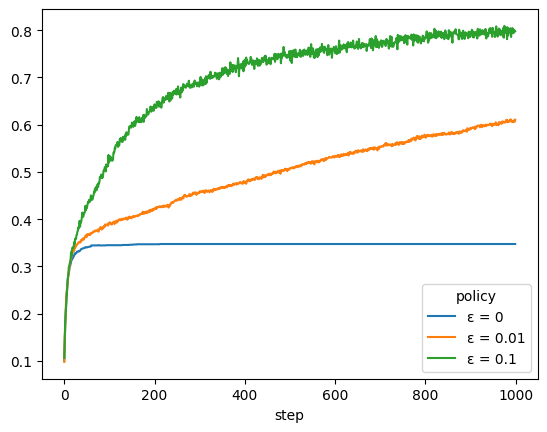

In [6]:
colors = {
    'ε = 0.1': 'tab:blue',
    'ε = 0.01': 'tab:red',
    'ε = 0': 'tab:green'
}

(
    trace_df
    .groupby(['step', 'policy'])
    ['is_action_optimal'].mean()
    .unstack()
    .plot()
)


## Handling drift

The environment used above is a toy situation used for introducing bandits. It is stationary, meaning that the expected reward of each arm does not change over time.

In practice, arms are dynamic, and their performance can vary over time. A simple example of this is the [Candy Cane Contest](https://www.kaggle.com/c/santa-2020) that was hosted on Kaggle in 2020. The expected reward of each arm diminishes each time it is pulled.

The way bandit policies in River deal with drift depends on the method. For the `bandit.EpsilonGreedy` policy, it makes sense to use a rolling average as the reward object. What this means is that the empirical reward the policy calculates for each arm is a rolling average, rather than a global one.

In [7]:
from river import proba, utils

policies=[
    bandit.EpsilonGreedy(
        epsilon=0.1,
        seed=42
    ),
    bandit.EpsilonGreedy(
        epsilon=0.3,
        reward_obj=utils.Rolling(stats.Mean(), window_size=50),
        seed=42
    ),
    bandit.ThompsonSampling(
        reward_obj=proba.Beta(),
        seed=42
    )
]

env = gym.make('river_bandits/CandyCaneContest-v0')

trace = bandit.evaluate(
    policies=policies,
    env=env,
    n_episodes=(n_episodes := 30),
    seed=42
)

trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))


  0%|          | 0/180000 [00:00<?, ?it/s]

  0%|          | 171/180000 [00:00<01:45, 1709.08it/s]

  1%|          | 972/180000 [00:00<00:33, 5408.15it/s]

  1%|          | 1728/180000 [00:00<00:27, 6388.45it/s]

  1%|▏         | 2487/180000 [00:00<00:25, 6859.35it/s]

  2%|▏         | 3246/180000 [00:00<00:24, 7120.46it/s]

  2%|▏         | 4005/180000 [00:00<00:24, 7277.60it/s]

  3%|▎         | 4761/180000 [00:00<00:23, 7366.02it/s]

  3%|▎         | 5512/180000 [00:00<00:23, 7411.59it/s]

  3%|▎         | 6254/180000 [00:00<00:24, 7193.26it/s]

  4%|▍         | 7036/180000 [00:01<00:23, 7381.20it/s]

  4%|▍         | 7783/180000 [00:01<00:23, 7407.50it/s]

  5%|▍         | 8535/180000 [00:01<00:23, 7440.32it/s]

  5%|▌         | 9285/180000 [00:01<00:22, 7454.18it/s]

  6%|▌         | 10031/180000 [00:01<00:22, 7450.45it/s]

  6%|▌         | 10777/180000 [00:01<00:22, 7446.60it/s]

  6%|▋         | 11522/180000 [00:01<00:22, 7437.35it/s]

  7%|▋         | 12266/180000 [00:01<00:23, 7222.46it/s]

  7%|▋         | 13041/180000 [00:01<00:22, 7376.46it/s]

  8%|▊         | 13780/180000 [00:01<00:22, 7349.16it/s]

  8%|▊         | 14516/180000 [00:02<00:22, 7347.95it/s]

  8%|▊         | 15255/180000 [00:02<00:22, 7358.45it/s]

  9%|▉         | 15995/180000 [00:02<00:22, 7370.04it/s]

  9%|▉         | 16733/180000 [00:02<00:22, 7368.11it/s]

 10%|▉         | 17471/180000 [00:02<00:22, 7369.53it/s]

 10%|█         | 18209/180000 [00:02<00:22, 7145.09it/s]

 11%|█         | 18984/180000 [00:02<00:21, 7320.37it/s]

 11%|█         | 19727/180000 [00:02<00:21, 7352.26it/s]

 11%|█▏        | 20466/180000 [00:02<00:21, 7358.76it/s]

 12%|█▏        | 21203/180000 [00:02<00:21, 7355.36it/s]

 12%|█▏        | 21942/180000 [00:03<00:21, 7360.45it/s]

 13%|█▎        | 22686/180000 [00:03<00:21, 7379.51it/s]

 13%|█▎        | 23429/180000 [00:03<00:21, 7393.52it/s]

 13%|█▎        | 24169/180000 [00:03<00:21, 7164.80it/s]

 14%|█▍        | 24947/180000 [00:03<00:21, 7344.44it/s]

 14%|█▍        | 25684/180000 [00:03<00:21, 7338.45it/s]

 15%|█▍        | 26424/180000 [00:03<00:20, 7353.44it/s]

 15%|█▌        | 27165/180000 [00:03<00:20, 7367.04it/s]

 16%|█▌        | 27903/180000 [00:03<00:20, 7360.53it/s]

 16%|█▌        | 28640/180000 [00:03<00:20, 7338.52it/s]

 16%|█▋        | 29376/180000 [00:04<00:20, 7340.34it/s]

 17%|█▋        | 30111/180000 [00:04<00:21, 7088.12it/s]

 17%|█▋        | 30903/180000 [00:04<00:20, 7326.25it/s]

 18%|█▊        | 31638/180000 [00:04<00:20, 7307.34it/s]

 18%|█▊        | 32379/180000 [00:04<00:20, 7332.63it/s]

 18%|█▊        | 33117/180000 [00:04<00:20, 7343.35it/s]

 19%|█▉        | 33853/180000 [00:04<00:19, 7344.70it/s]

 19%|█▉        | 34588/180000 [00:04<00:19, 7335.55it/s]

 20%|█▉        | 35322/180000 [00:04<00:19, 7331.46it/s]

 20%|██        | 36056/180000 [00:04<00:20, 7056.27it/s]

 20%|██        | 36862/180000 [00:05<00:19, 7347.60it/s]

 21%|██        | 37623/180000 [00:05<00:19, 7421.49it/s]

 21%|██▏       | 38379/180000 [00:05<00:18, 7457.06it/s]

 22%|██▏       | 39138/180000 [00:05<00:18, 7492.73it/s]

 22%|██▏       | 39889/180000 [00:05<00:18, 7496.59it/s]

 23%|██▎       | 40641/180000 [00:05<00:18, 7499.79it/s]

 23%|██▎       | 41393/180000 [00:05<00:18, 7505.45it/s]

 23%|██▎       | 42144/180000 [00:05<00:19, 7244.21it/s]

 24%|██▍       | 42924/180000 [00:05<00:18, 7402.90it/s]

 24%|██▍       | 43667/180000 [00:05<00:18, 7382.31it/s]

 25%|██▍       | 44414/180000 [00:06<00:18, 7408.07it/s]

 25%|██▌       | 45159/180000 [00:06<00:18, 7416.41it/s]

 26%|██▌       | 45902/180000 [00:06<00:18, 7414.95it/s]

 26%|██▌       | 46644/180000 [00:06<00:18, 7401.85it/s]

 26%|██▋       | 47385/180000 [00:06<00:17, 7389.03it/s]

 27%|██▋       | 48125/180000 [00:06<00:18, 7126.74it/s]

 27%|██▋       | 48902/180000 [00:06<00:17, 7314.01it/s]

 28%|██▊       | 49636/180000 [00:06<00:17, 7300.34it/s]

 28%|██▊       | 50368/180000 [00:06<00:17, 7295.90it/s]

 28%|██▊       | 51099/180000 [00:07<00:17, 7294.08it/s]

 29%|██▉       | 51831/180000 [00:07<00:17, 7299.55it/s]

 29%|██▉       | 52567/180000 [00:07<00:17, 7317.45it/s]

 30%|██▉       | 53304/180000 [00:07<00:17, 7327.89it/s]

 30%|███       | 54038/180000 [00:07<00:17, 7047.38it/s]

 30%|███       | 54829/180000 [00:07<00:17, 7297.35it/s]

 31%|███       | 55562/180000 [00:07<00:17, 7290.65it/s]

 31%|███▏      | 56293/180000 [00:07<00:17, 7275.95it/s]

 32%|███▏      | 57022/180000 [00:07<00:16, 7271.54it/s]

 32%|███▏      | 57753/180000 [00:07<00:16, 7280.05it/s]

 32%|███▏      | 58483/180000 [00:08<00:16, 7285.68it/s]

 33%|███▎      | 59212/180000 [00:08<00:16, 7155.86it/s]

 33%|███▎      | 59946/180000 [00:08<00:16, 7205.45it/s]

 34%|███▎      | 60668/180000 [00:08<00:16, 7068.11it/s]

 34%|███▍      | 61404/180000 [00:08<00:16, 7149.93it/s]

 35%|███▍      | 62140/180000 [00:08<00:16, 7211.29it/s]

 35%|███▍      | 62877/180000 [00:08<00:16, 7252.87it/s]

 35%|███▌      | 63612/180000 [00:08<00:15, 7281.25it/s]

 36%|███▌      | 64350/180000 [00:08<00:15, 7304.75it/s]

 36%|███▌      | 65091/180000 [00:08<00:15, 7332.65it/s]

 37%|███▋      | 65825/180000 [00:09<00:15, 7333.28it/s]

 37%|███▋      | 66559/180000 [00:09<00:15, 7189.68it/s]

 37%|███▋      | 67299/180000 [00:09<00:15, 7247.25it/s]

 38%|███▊      | 68031/180000 [00:09<00:15, 7266.53it/s]

 38%|███▊      | 68766/180000 [00:09<00:15, 7288.02it/s]

 39%|███▊      | 69498/180000 [00:09<00:15, 7295.13it/s]

 39%|███▉      | 70236/180000 [00:09<00:15, 7314.25it/s]

 39%|███▉      | 70971/180000 [00:09<00:14, 7323.82it/s]

 40%|███▉      | 71709/180000 [00:09<00:14, 7340.53it/s]

 40%|████      | 72444/180000 [00:09<00:14, 7180.63it/s]

 41%|████      | 73203/180000 [00:10<00:14, 7296.38it/s]

 41%|████      | 73934/180000 [00:10<00:15, 7025.76it/s]

 41%|████▏     | 74670/180000 [00:10<00:14, 7122.08it/s]

 42%|████▏     | 75402/180000 [00:10<00:14, 7179.88it/s]

 42%|████▏     | 76141/180000 [00:10<00:14, 7241.62it/s]

 43%|████▎     | 76875/180000 [00:10<00:14, 7269.57it/s]

 43%|████▎     | 77616/180000 [00:10<00:14, 7307.99it/s]

 44%|████▎     | 78348/180000 [00:10<00:14, 7145.74it/s]

 44%|████▍     | 79108/180000 [00:10<00:13, 7278.21it/s]

 44%|████▍     | 79842/180000 [00:10<00:13, 7292.81it/s]

 45%|████▍     | 80573/180000 [00:11<00:13, 7111.19it/s]

 45%|████▌     | 81286/180000 [00:11<00:13, 7115.16it/s]

 46%|████▌     | 82014/180000 [00:11<00:13, 7161.35it/s]

 46%|████▌     | 82740/180000 [00:11<00:13, 7187.63it/s]

 46%|████▋     | 83473/180000 [00:11<00:13, 7229.53it/s]

 47%|████▋     | 84197/180000 [00:11<00:13, 7039.60it/s]

 47%|████▋     | 84972/180000 [00:11<00:13, 7244.53it/s]

 48%|████▊     | 85704/180000 [00:11<00:12, 7265.81it/s]

 48%|████▊     | 86435/180000 [00:11<00:12, 7277.81it/s]

 48%|████▊     | 87164/180000 [00:11<00:12, 7273.81it/s]

 49%|████▉     | 87892/180000 [00:12<00:12, 7262.34it/s]

 49%|████▉     | 88619/180000 [00:12<00:13, 7011.46it/s]

 50%|████▉     | 89352/180000 [00:12<00:12, 7099.42it/s]

 50%|█████     | 90064/180000 [00:12<00:12, 6919.13it/s]

 50%|█████     | 90858/180000 [00:12<00:12, 7214.16it/s]

 51%|█████     | 91596/180000 [00:12<00:12, 7262.64it/s]

 51%|█████▏    | 92334/180000 [00:12<00:12, 7294.69it/s]

 52%|█████▏    | 93078/180000 [00:12<00:11, 7332.55it/s]

 52%|█████▏    | 93816/180000 [00:12<00:11, 7340.53it/s]

 53%|█████▎    | 94560/180000 [00:13<00:11, 7364.33it/s]

 53%|█████▎    | 95301/180000 [00:13<00:11, 7374.85it/s]

 53%|█████▎    | 96039/180000 [00:13<00:11, 7087.62it/s]

 54%|█████▍    | 96834/180000 [00:13<00:11, 7334.01it/s]

 54%|█████▍    | 97570/180000 [00:13<00:11, 7338.18it/s]

 55%|█████▍    | 98306/180000 [00:13<00:11, 7340.03it/s]

 55%|█████▌    | 99042/180000 [00:13<00:11, 7336.74it/s]

 55%|█████▌    | 99777/180000 [00:13<00:10, 7333.64it/s]

 56%|█████▌    | 100511/180000 [00:13<00:10, 7324.95it/s]

 56%|█████▌    | 101244/180000 [00:13<00:10, 7322.11it/s]

 57%|█████▋    | 101979/180000 [00:14<00:10, 7325.05it/s]

 57%|█████▋    | 102712/180000 [00:14<00:10, 7203.97it/s]

 57%|█████▋    | 103433/180000 [00:14<00:11, 6947.51it/s]

 58%|█████▊    | 104155/180000 [00:14<00:10, 7025.78it/s]

 58%|█████▊    | 104883/180000 [00:14<00:10, 7098.59it/s]

 59%|█████▊    | 105612/180000 [00:14<00:10, 7153.33it/s]

 59%|█████▉    | 106341/180000 [00:14<00:10, 7187.63it/s]

 59%|█████▉    | 107068/180000 [00:14<00:10, 7211.65it/s]

 60%|█████▉    | 107793/180000 [00:14<00:09, 7221.54it/s]

 60%|██████    | 108516/180000 [00:14<00:10, 7092.94it/s]

 61%|██████    | 109254/180000 [00:15<00:09, 7177.32it/s]

 61%|██████    | 109986/180000 [00:15<00:09, 7214.30it/s]

 62%|██████▏   | 110708/180000 [00:15<00:09, 7212.53it/s]

 62%|██████▏   | 111444/180000 [00:15<00:09, 7254.46it/s]

 62%|██████▏   | 112175/180000 [00:15<00:09, 7270.71it/s]

 63%|██████▎   | 112908/180000 [00:15<00:09, 7284.28it/s]

 63%|██████▎   | 113649/180000 [00:15<00:09, 7315.92it/s]

 64%|██████▎   | 114381/180000 [00:15<00:09, 7117.83it/s]

 64%|██████▍   | 115131/180000 [00:15<00:08, 7226.43it/s]

 64%|██████▍   | 115875/180000 [00:15<00:08, 7287.88it/s]

 65%|██████▍   | 116610/180000 [00:16<00:08, 7301.42it/s]

 65%|██████▌   | 117348/180000 [00:16<00:08, 7324.31it/s]

 66%|██████▌   | 118086/180000 [00:16<00:08, 7337.79it/s]

 66%|██████▌   | 118821/180000 [00:16<00:08, 7308.39it/s]

 66%|██████▋   | 119562/180000 [00:16<00:08, 7336.94it/s]

 67%|██████▋   | 120296/180000 [00:16<00:08, 7150.92it/s]

 67%|██████▋   | 121062/180000 [00:16<00:08, 7294.52it/s]

 68%|██████▊   | 121806/180000 [00:16<00:07, 7332.02it/s]

 68%|██████▊   | 122544/180000 [00:16<00:07, 7345.91it/s]

 68%|██████▊   | 123292/180000 [00:16<00:07, 7385.46it/s]

 69%|██████▉   | 124044/180000 [00:17<00:07, 7420.99it/s]

 69%|██████▉   | 124794/180000 [00:17<00:07, 7443.01it/s]

 70%|██████▉   | 125541/180000 [00:17<00:07, 7445.40it/s]

 70%|███████   | 126286/180000 [00:17<00:07, 7188.50it/s]

 71%|███████   | 127056/180000 [00:17<00:07, 7333.65it/s]

 71%|███████   | 127794/180000 [00:17<00:07, 7346.04it/s]

 71%|███████▏  | 128530/180000 [00:17<00:07, 7340.66it/s]

 72%|███████▏  | 129265/180000 [00:17<00:06, 7339.54it/s]

 72%|███████▏  | 130000/180000 [00:17<00:06, 7334.87it/s]

 73%|███████▎  | 130738/180000 [00:17<00:06, 7347.00it/s]

 73%|███████▎  | 131477/180000 [00:18<00:06, 7359.34it/s]

 73%|███████▎  | 132214/180000 [00:18<00:06, 7139.23it/s]

 74%|███████▍  | 132972/180000 [00:18<00:06, 7268.15it/s]

 74%|███████▍  | 133701/180000 [00:18<00:06, 7263.09it/s]

 75%|███████▍  | 134432/180000 [00:18<00:06, 7275.53it/s]

 75%|███████▌  | 135161/180000 [00:18<00:06, 7277.92it/s]

 75%|███████▌  | 135890/180000 [00:18<00:06, 7278.20it/s]

 76%|███████▌  | 136623/180000 [00:18<00:05, 7292.81it/s]

 76%|███████▋  | 137356/180000 [00:18<00:05, 7302.84it/s]

 77%|███████▋  | 138087/180000 [00:19<00:05, 7025.58it/s]

 77%|███████▋  | 138864/180000 [00:19<00:05, 7236.44it/s]

 78%|███████▊  | 139593/180000 [00:19<00:05, 7251.29it/s]

 78%|███████▊  | 140334/180000 [00:19<00:05, 7296.85it/s]

 78%|███████▊  | 141067/180000 [00:19<00:05, 7306.27it/s]

 79%|███████▉  | 141801/180000 [00:19<00:05, 7315.64it/s]

 79%|███████▉  | 142539/180000 [00:19<00:05, 7334.14it/s]

 80%|███████▉  | 143274/180000 [00:19<00:05, 7333.87it/s]

 80%|████████  | 144008/180000 [00:19<00:05, 7034.86it/s]

 80%|████████  | 144807/180000 [00:19<00:04, 7310.42it/s]

 81%|████████  | 145551/180000 [00:20<00:04, 7344.74it/s]

 81%|████████▏ | 146298/180000 [00:20<00:04, 7376.02it/s]

 82%|████████▏ | 147045/180000 [00:20<00:04, 7403.05it/s]

 82%|████████▏ | 147787/180000 [00:20<00:04, 7406.79it/s]

 83%|████████▎ | 148529/180000 [00:20<00:04, 7115.83it/s]

 83%|████████▎ | 149273/180000 [00:20<00:04, 7208.82it/s]

 83%|████████▎ | 150001/180000 [00:20<00:04, 7108.45it/s]

 84%|████████▍ | 150759/180000 [00:20<00:04, 7240.47it/s]

 84%|████████▍ | 151508/180000 [00:20<00:03, 7313.10it/s]

 85%|████████▍ | 152250/180000 [00:20<00:03, 7342.15it/s]

 85%|████████▍ | 152991/180000 [00:21<00:03, 7360.37it/s]

 85%|████████▌ | 153732/180000 [00:21<00:03, 7373.03it/s]

 86%|████████▌ | 154476/180000 [00:21<00:03, 7392.32it/s]

 86%|████████▌ | 155216/180000 [00:21<00:03, 7387.42it/s]

 87%|████████▋ | 155955/180000 [00:21<00:03, 7346.82it/s]

 87%|████████▋ | 156690/180000 [00:21<00:03, 7226.76it/s]

 87%|████████▋ | 157425/180000 [00:21<00:03, 7262.82it/s]

 88%|████████▊ | 158152/180000 [00:21<00:03, 7255.11it/s]

 88%|████████▊ | 158878/180000 [00:21<00:02, 7249.00it/s]

 89%|████████▊ | 159609/180000 [00:21<00:02, 7264.02it/s]

 89%|████████▉ | 160341/180000 [00:22<00:02, 7276.18it/s]

 89%|████████▉ | 161069/180000 [00:22<00:02, 7273.19it/s]

 90%|████████▉ | 161797/180000 [00:22<00:02, 7272.26it/s]

 90%|█████████ | 162525/180000 [00:22<00:02, 7117.75it/s]

 91%|█████████ | 163264/180000 [00:22<00:02, 7197.86it/s]

 91%|█████████ | 164004/180000 [00:22<00:02, 7251.69it/s]

 92%|█████████▏| 164745/180000 [00:22<00:02, 7296.73it/s]

 92%|█████████▏| 165486/180000 [00:22<00:01, 7327.36it/s]

 92%|█████████▏| 166224/180000 [00:22<00:01, 7341.90it/s]

 93%|█████████▎| 166959/180000 [00:22<00:01, 7335.38it/s]

 93%|█████████▎| 167697/180000 [00:23<00:01, 7348.45it/s]

 94%|█████████▎| 168432/180000 [00:23<00:01, 7179.63it/s]

 94%|█████████▍| 169188/180000 [00:23<00:01, 7286.39it/s]

 94%|█████████▍| 169920/180000 [00:23<00:01, 7294.48it/s]

 95%|█████████▍| 170655/180000 [00:23<00:01, 7306.58it/s]

 95%|█████████▌| 171387/180000 [00:23<00:01, 7302.01it/s]

 96%|█████████▌| 172118/180000 [00:23<00:01, 7299.10it/s]

 96%|█████████▌| 172849/180000 [00:23<00:00, 7242.50it/s]

 96%|█████████▋| 173574/180000 [00:23<00:00, 7172.09it/s]

 97%|█████████▋| 174292/180000 [00:23<00:00, 7034.65it/s]

 97%|█████████▋| 175051/180000 [00:24<00:00, 7197.09it/s]

 98%|█████████▊| 175794/180000 [00:24<00:00, 7264.40it/s]

 98%|█████████▊| 176541/180000 [00:24<00:00, 7320.98it/s]

 98%|█████████▊| 177291/180000 [00:24<00:00, 7369.49it/s]

 99%|█████████▉| 178029/180000 [00:24<00:00, 7070.51it/s]

 99%|█████████▉| 178766/180000 [00:24<00:00, 7156.74it/s]

100%|█████████▉| 179505/180000 [00:24<00:00, 7224.72it/s]

100%|██████████| 180000/180000 [00:24<00:00, 7264.94it/s]

We can compare the performance of each policy by checking the average reward at the end of each episode.

In [8]:
(
    trace_df
    .groupby(['policy_idx', 'episode'])
    .last()
    .groupby('policy_idx')
    .reward_stat.mean()
)



policy_idx
0    736.1
1    817.0
2    854.0
Name: reward_stat, dtype: float64

We see that using a rolling average gives a boost to the epsilon greedy strategy. However, we see that the `bandit.ThompsonSampling` policy performs even better, even though no particular care was given to drift. A natural next step would thus be to see how it could be improved to handle drift. For instance, its `dist` parameter could be wrapped with a `utils.Rolling`:

In [9]:
policy = bandit.ThompsonSampling(
    reward_obj=utils.Rolling(proba.Beta(), window_size=50),
    seed=42
)


Bandits can be used for several tasks. They can be used for content personalization, as well as online model selection (see `model_selection.BanditRegressor`). The policies in River are therefore designed to be flexible, so that they can be used in conjunction with other River modules. For instance, the `reward_obj` in `bandit.EpsilonGreedy` can be a metric, a probability distribution, or a statistic. This works because objects in River adher to a coherent get/update interface.